# **Project 3**, APS1070 Fall 2020
#### **PCA [20 marks]**
**Deadline: Nov 8, 23:59**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: **Haoying Sun**
*   **Student number**: **1002112108**



We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1-4**.
* The second Covid-19 dataset reports the total number of deaths for each country at the end of each day. We use this dataset in **Part 4**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 5**.

# Part 1: Getting started [3 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

In [ ]:
cases_raw

22-Jan  23-Jan  24-Jan  ...  10-Oct  11-Oct  12-Oct
Afghanistan              0       0       0  ...   39703   39799   39870
Albania                  0       0       0  ...   15231   15399   15570
Algeria                  0       0       0  ...   52940   53072   53325
Andorra                  0       0       0  ...    2696    2696    2995
Angola                   0       0       0  ...    6246    6366    6488
...                    ...     ...     ...  ...     ...     ...     ...
West Bank and Gaza       0       0       0  ...   43945   44299   44684
Western Sahara           0       0       0  ...      10      10      10
Yemen                    0       0       0  ...    2051    2052    2052
Zambia                   0       0       0  ...   15415   15458   15549
Zimbabwe                 0       0       0  ...    8010    8011    8021

[189 rows x 265 columns]

**1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. [1]**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
df_cases = cases_raw.T
df_cases['Time'] = cases_raw.columns
df_cases

Afghanistan  Albania  Algeria  Andorra  ...  Yemen  Zambia  Zimbabwe    Time
22-Jan            0        0        0        0  ...      0       0         0  22-Jan
23-Jan            0        0        0        0  ...      0       0         0  23-Jan
24-Jan            0        0        0        0  ...      0       0         0  24-Jan
25-Jan            0        0        0        0  ...      0       0         0  25-Jan
26-Jan            0        0        0        0  ...      0       0         0  26-Jan
...             ...      ...      ...      ...  ...    ...     ...       ...     ...
08-Oct        39616    14899    52658     2568  ...   2050   15301      7951  08-Oct
09-Oct        39693    15066    52804     2696  ...   2051   15339      7994  09-Oct
10-Oct        39703    15231    52940     2696  ...   2051   15415      8010  10-Oct
11-Oct        39799    15399    53072     2696  ...   2052   15458      8011  11-Oct
12-Oct        39870    15570    53325     2995  ...   2052   15549      8021  12-Oct

[265 rows x 190 columns]

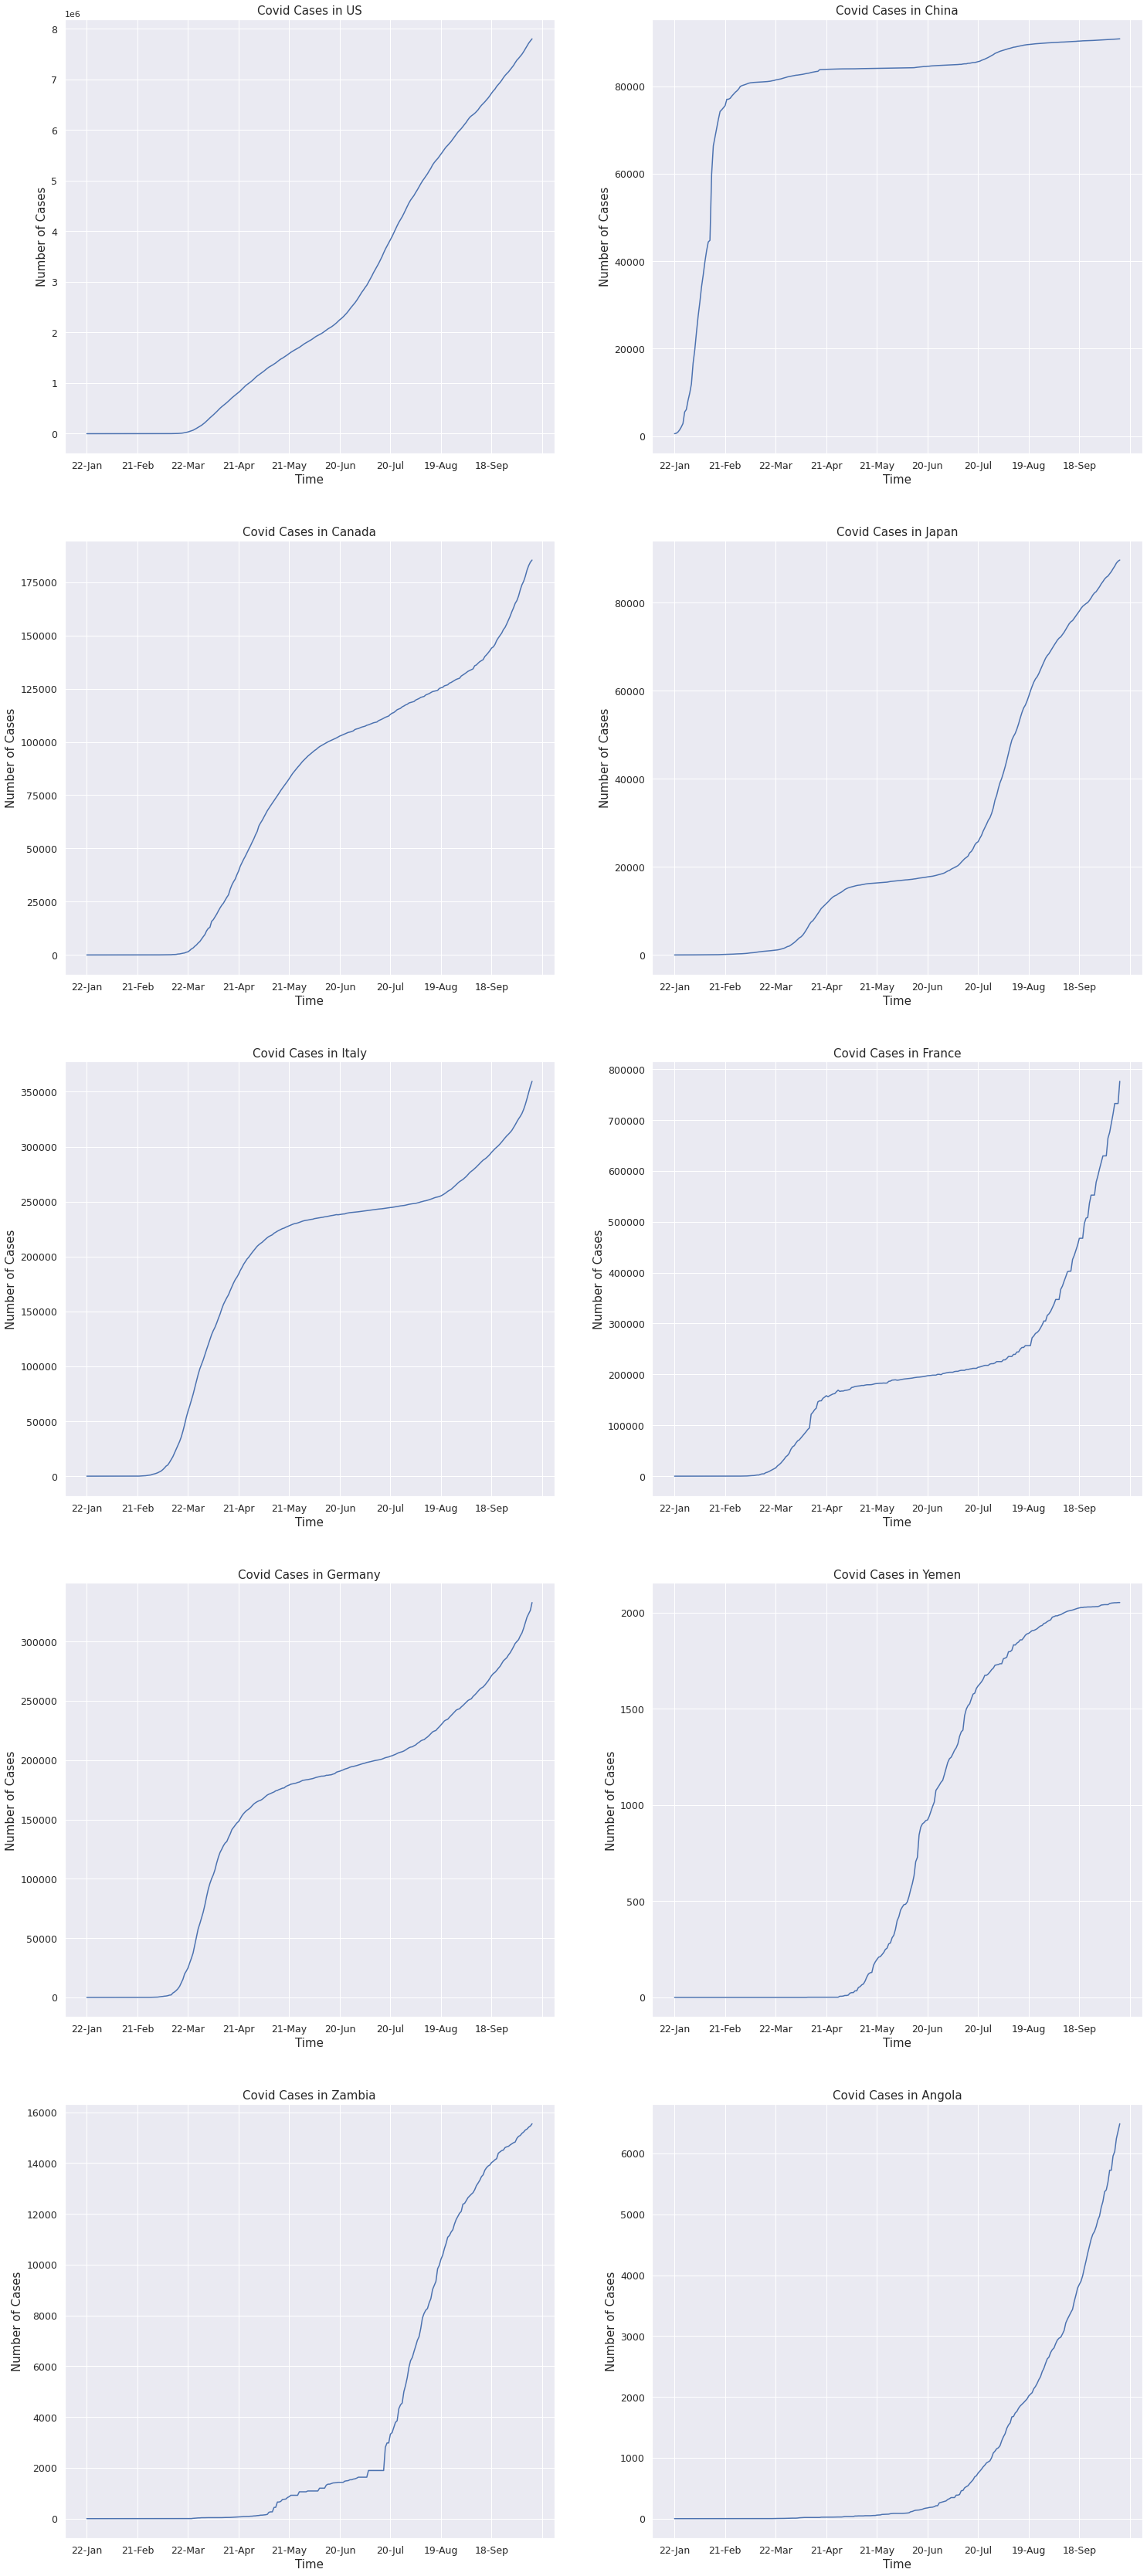

In [ ]:
#Plot covid cases for US, China, Canada, Japan, Italy, France, Germany, Yemen, Zambia, Angola

fig_dims = (25,60)
sns.set_theme(style="darkgrid")
fig,axes = plt.subplots(5,2,figsize=fig_dims)

g1 = sns.lineplot(x='Time', y='US', data=df_cases, ax=axes[0,0])
g1.xaxis.set_major_locator(ticker.MultipleLocator(30))
g1.set_xlabel('Time', fontsize = 15)
g1.set_ylabel('Number of Cases', fontsize = 15)
g1.set_title('Covid Cases in US', fontsize = 15)
g1.tick_params(labelsize=12.5)

g2 = sns.lineplot(x='Time', y='China', data=df_cases, ax=axes[0,1])
g2.xaxis.set_major_locator(ticker.MultipleLocator(30))
g2.set_xlabel('Time', fontsize = 15)
g2.set_ylabel('Number of Cases', fontsize = 15)
g2.set_title('Covid Cases in China', fontsize = 15)
g2.tick_params(labelsize=12.5)

g3 = sns.lineplot(x='Time', y='Canada', data=df_cases, ax=axes[1,0])
g3.xaxis.set_major_locator(ticker.MultipleLocator(30))
g3.set_xlabel('Time', fontsize = 15)
g3.set_ylabel('Number of Cases', fontsize = 15)
g3.set_title('Covid Cases in Canada', fontsize = 15)
g3.tick_params(labelsize=12.5)

g4 = sns.lineplot(x='Time', y='Japan', data=df_cases, ax=axes[1,1])
g4.xaxis.set_major_locator(ticker.MultipleLocator(30))
g4.set_xlabel('Time', fontsize = 15)
g4.set_ylabel('Number of Cases', fontsize = 15)
g4.set_title('Covid Cases in Japan', fontsize = 15)
g4.tick_params(labelsize=12.5)

g5 = sns.lineplot(x='Time', y='Italy', data=df_cases, ax=axes[2,0])
g5.xaxis.set_major_locator(ticker.MultipleLocator(30))
g5.set_xlabel('Time', fontsize = 15)
g5.set_ylabel('Number of Cases', fontsize = 15)
g5.set_title('Covid Cases in Italy', fontsize = 15)
g5.tick_params(labelsize=12.5)

g6 = sns.lineplot(x='Time', y='France', data=df_cases, ax=axes[2,1])
g6.xaxis.set_major_locator(ticker.MultipleLocator(30))
g6.set_xlabel('Time', fontsize = 15)
g6.set_ylabel('Number of Cases', fontsize = 15)
g6.set_title('Covid Cases in France', fontsize = 15)
g6.tick_params(labelsize=12.5)

g7 = sns.lineplot(x='Time', y='Germany', data=df_cases, ax=axes[3,0])
g7.xaxis.set_major_locator(ticker.MultipleLocator(30))
g7.set_xlabel('Time', fontsize = 15)
g7.set_ylabel('Number of Cases', fontsize = 15)
g7.set_title('Covid Cases in Germany', fontsize = 15)
g7.tick_params(labelsize=12.5)

g8 = sns.lineplot(x='Time', y='Yemen', data=df_cases, ax=axes[3,1])
g8.xaxis.set_major_locator(ticker.MultipleLocator(30))
g8.set_xlabel('Time', fontsize = 15)
g8.set_ylabel('Number of Cases', fontsize = 15)
g8.set_title('Covid Cases in Yemen', fontsize = 15)
g8.tick_params(labelsize=12.5)

g9 = sns.lineplot(x='Time', y='Zambia', data=df_cases, ax=axes[4,0])
g9.xaxis.set_major_locator(ticker.MultipleLocator(30))
g9.set_xlabel('Time', fontsize = 15)
g9.set_ylabel('Number of Cases', fontsize = 15)
g9.set_title('Covid Cases in Zambia', fontsize = 15)
g9.tick_params(labelsize=12.5)

g10 = sns.lineplot(x='Time', y='Angola', data=df_cases, ax=axes[4,1])
g10.xaxis.set_major_locator(ticker.MultipleLocator(30))
g10.set_xlabel('Time', fontsize = 15)
g10.set_ylabel('Number of Cases', fontsize = 15)
g10.set_title('Covid Cases in Angola', fontsize = 15)
g10.tick_params(labelsize=12.5)

plt.show()

**2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. [0.5]**

In [ ]:
#Applying standardscalar to standardize the entire dataset

from sklearn.preprocessing import StandardScaler

time = cases_raw.columns
features = cases_raw.index
cases_scaled = StandardScaler().fit_transform(cases_raw)
df_cases_scaled = pd.DataFrame(data=cases_scaled, index = features, columns = time)
df_cases_scaled = df_cases_scaled.T
df_cases_scaled['Time'] = time
df_cases_scaled

Afghanistan   Albania   Algeria  ...    Zambia  Zimbabwe    Time
22-Jan    -0.073868 -0.073868 -0.073868  ... -0.073868 -0.073868  22-Jan
23-Jan    -0.074185 -0.074185 -0.074185  ... -0.074185 -0.074185  23-Jan
24-Jan    -0.074604 -0.074604 -0.074604  ... -0.074604 -0.074604  24-Jan
25-Jan    -0.074391 -0.074391 -0.074391  ... -0.074391 -0.074391  25-Jan
26-Jan    -0.074450 -0.074450 -0.074450  ... -0.074450 -0.074450  26-Jan
...             ...       ...       ...  ...       ...       ...     ...
08-Oct    -0.183560 -0.213101 -0.167973  ... -0.212621 -0.221405  08-Oct
09-Oct    -0.184207 -0.213395 -0.168667  ... -0.213071 -0.221777  09-Oct
10-Oct    -0.184782 -0.213555 -0.169218  ... -0.213338 -0.222045  10-Oct
11-Oct    -0.185131 -0.213634 -0.169626  ... -0.213565 -0.222264  11-Oct
12-Oct    -0.185964 -0.214183 -0.170339  ... -0.214208 -0.222950  12-Oct

[265 rows x 190 columns]

**3. Plot the standardized time-series for the same countries as you chose in `Step 1`. [0.5]**

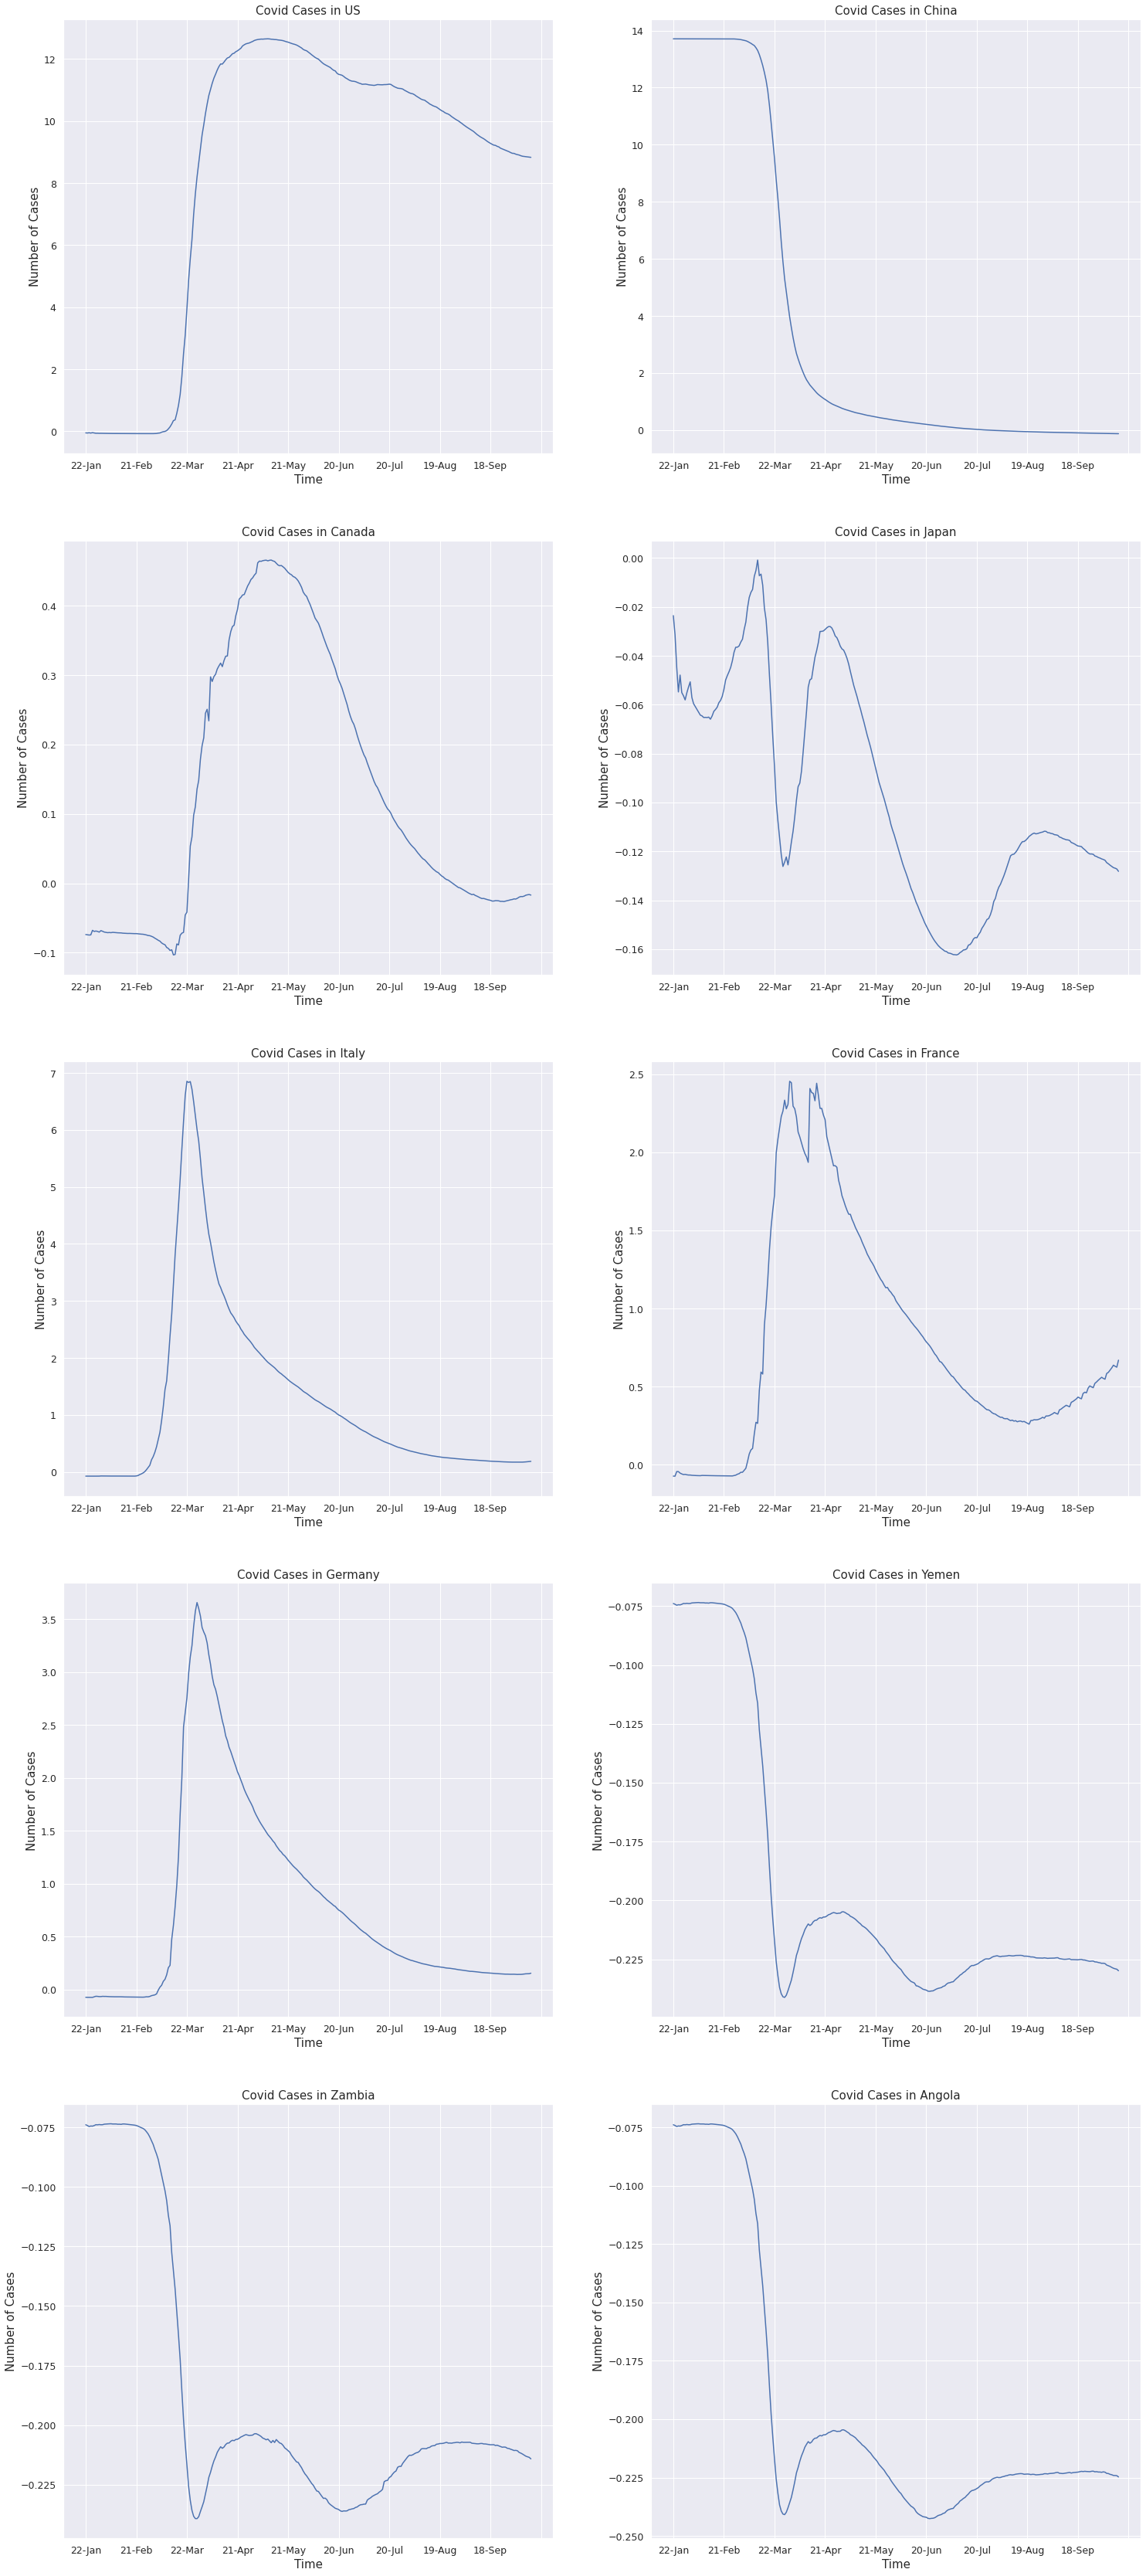

In [ ]:
#Plotting standardized covid data

fig_dims = (25,60)
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(5,2,figsize=fig_dims)

g1 = sns.lineplot(x='Time', y='US', data=df_cases_scaled, ax=axes[0,0])
g1.xaxis.set_major_locator(ticker.MultipleLocator(30))
g1.set_xlabel('Time', fontsize=15)
g1.set_ylabel('Number of Cases', fontsize=15)
g1.set_title('Covid Cases in US', fontsize=15)
g1.tick_params(labelsize=12.5)

g2 = sns.lineplot(x='Time', y='China', data=df_cases_scaled, ax=axes[0,1])
g2.xaxis.set_major_locator(ticker.MultipleLocator(30))
g2.set_xlabel('Time', fontsize=15)
g2.set_ylabel('Number of Cases', fontsize=15)
g2.set_title('Covid Cases in China', fontsize=15)
g2.tick_params(labelsize=12.5)

g3 = sns.lineplot(x='Time', y='Canada', data=df_cases_scaled, ax=axes[1,0])
g3.xaxis.set_major_locator(ticker.MultipleLocator(30))
g3.set_xlabel('Time', fontsize=15)
g3.set_ylabel('Number of Cases', fontsize=15)
g3.set_title('Covid Cases in Canada', fontsize=15)
g3.tick_params(labelsize=12.5)

g4 = sns.lineplot(x='Time', y='Japan', data=df_cases_scaled, ax=axes[1,1])
g4.xaxis.set_major_locator(ticker.MultipleLocator(30))
g4.set_xlabel('Time', fontsize=15)
g4.set_ylabel('Number of Cases', fontsize=15)
g4.set_title('Covid Cases in Japan', fontsize=15)
g4.tick_params(labelsize=12.5)

g5 = sns.lineplot(x='Time', y='Italy', data=df_cases_scaled, ax=axes[2,0])
g5.xaxis.set_major_locator(ticker.MultipleLocator(30))
g5.set_xlabel('Time', fontsize=15)
g5.set_ylabel('Number of Cases', fontsize=15)
g5.set_title('Covid Cases in Italy', fontsize=15)
g5.tick_params(labelsize=12.5)

g6 = sns.lineplot(x='Time', y='France', data=df_cases_scaled, ax=axes[2,1])
g6.xaxis.set_major_locator(ticker.MultipleLocator(30))
g6.set_xlabel('Time', fontsize=15)
g6.set_ylabel('Number of Cases', fontsize=15)
g6.set_title('Covid Cases in France', fontsize=15)
g6.tick_params(labelsize=12.5)

g7 = sns.lineplot(x='Time', y='Germany', data=df_cases_scaled, ax=axes[3,0])
g7.xaxis.set_major_locator(ticker.MultipleLocator(30))
g7.set_xlabel('Time', fontsize=15)
g7.set_ylabel('Number of Cases', fontsize=15)
g7.set_title('Covid Cases in Germany', fontsize=15)
g7.tick_params(labelsize=12.5)

g8 = sns.lineplot(x='Time', y='Yemen', data=df_cases_scaled, ax=axes[3,1])
g8.xaxis.set_major_locator(ticker.MultipleLocator(30))
g8.set_xlabel('Time', fontsize=15)
g8.set_ylabel('Number of Cases', fontsize=15)
g8.set_title('Covid Cases in Yemen', fontsize=15)
g8.tick_params(labelsize=12.5)

g9 = sns.lineplot(x='Time', y='Zambia', data=df_cases_scaled, ax=axes[4,0])
g9.xaxis.set_major_locator(ticker.MultipleLocator(30))
g9.set_xlabel('Time', fontsize=15)
g9.set_ylabel('Number of Cases', fontsize=15)
g9.set_title('Covid Cases in Zambia', fontsize=15)
g9.tick_params(labelsize=12.5)

g10 = sns.lineplot(x='Time', y='Angola', data=df_cases_scaled, ax=axes[4,1])
g10.xaxis.set_major_locator(ticker.MultipleLocator(30))
g10.set_xlabel('Time', fontsize=15)
g10.set_ylabel('Number of Cases', fontsize=15)
g10.set_title('Covid Cases in Angola', fontsize=15)
g10.tick_params(labelsize=12.5)

plt.show()

**4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down? What do negative and positive values mean? [1]**

*When the curve goes up, it means the total number of cases of the country during that specific period of time increases at a faster rate than the average number of cases of the entire 189 countries. When the curve goes down, it means the total number of cases of the country during that specific period of time increases at a slower rate than the average number of cases of the entire 189 countries.*

*A positive value means the number of cases is above the average number of cases of the entire 189 countries. A negative value means the number of cases is below the average number of cases of the entire 189 countries.*

# Part 2: Applying PCA [3 Marks]

**1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265). [0.5]**

In [ ]:
# Compute covariance matrix

n,m = cases_scaled.shape
C = np.dot(cases_scaled.T, cases_scaled) / (n-1) 
C.shape

(265, 265)

**2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. [0.5]**

In [ ]:
#Computing eigen values and eigen vectors

eigenValues, eigenVectors = np.linalg.eigh(C) 
print ("Eigen Vector:\n ",eigenVectors, " \n\n Eigen Value: \n", eigenValues)

Eigen Vector:
  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.79748680e-02
   1.24541889e-01 -5.44783129e-03]
 [-2.98377995e-02  5.94720401e-02 -1.01020935e-02 ...  3.79902133e-02
   1.24541683e-01 -5.42558367e-03]
 [ 7.58303486e-03 -4.08175495e-02 -9.16715737e-03 ...  3.78644184e-02
   1.24547692e-01 -5.47420297e-03]
 ...
 [ 1.10861783e-03  4.27225319e-05  8.26251408e-03 ...  8.33006433e-02
  -1.58149961e-02 -6.72209362e-02]
 [-8.68838851e-03  6.67246624e-03 -4.63488489e-04 ...  8.33438265e-02
  -1.58156089e-02 -6.71797242e-02]
 [ 1.00891006e-02 -2.20403562e-02 -1.00950276e-02 ...  8.29795840e-02
  -1.57812604e-02 -6.71748520e-02]]  

 Eigen Value: 
 [-4.73661828e-14 -4.71024978e-14 -3.97583791e-14 -3.94822332e-14
 -2.87802640e-14 -2.48007766e-14 -2.07801531e-14 -1.74123052e-14
 -1.27948362e-14 -1.16022729e-14 -8.83018825e-15 -7.49106463e-15
 -5.68979930e-15 -4.68478123e-15 -4.01995794e-15 -3.87548993e-15
 -3.82978563e-15 -3.42862784e-15 -3.33829999e-15 -2.97109047e-15
 -2.

**3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. [0.5]**

In [ ]:
#Sort eigen values and eigen vectors in decreasing order

args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]

In [ ]:
#Calculating explained variances and cumulative variances

eigValSum = sum(eigenValues)
explained_Var = [eigV/eigValSum*100 for eigV in eigenValues]
cumulative_ExpVar = np.cumsum(explained_Var)
#cumulative_ExpVar

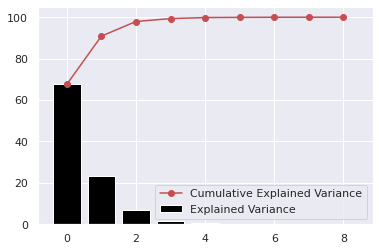

In [ ]:
#Plotting the first 10 eigen vectors

plt.bar(range(9), explained_Var[0:9], color='black', label='Explained Variance')
plt.plot(cumulative_ExpVar[0:9], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

**4. How many PCs do you need to cover 99\% of the dataset's variance? [0.5]**

*As shown below, 6 PCs are needed to cover 99% of the dataset's variance.*

In [ ]:
for i in range (len(cumulative_ExpVar)):
  print("% variance covered with",i+1,"PC(s):",cumulative_ExpVar[i])
  
  if cumulative_ExpVar[i] > 99:
    break
  
print("\n As shown above,", i+1, "PCs are needed to cover 99% of the dataset's variance.")

% variance covered with 1 PC(s): 67.53148736585624
% variance covered with 2 PC(s): 90.84137078884291
% variance covered with 3 PC(s): 97.91963411615981
% variance covered with 4 PC(s): 99.31855518895324

 As shown above, 4 PCs are needed to cover 99% of the dataset's variance.



**5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). [0.5]**

In [ ]:
eigenVectors.shape

(265, 265)

In [ ]:
eigenVectors

array([[-5.44783129e-03,  1.24541889e-01,  3.79748680e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.42558367e-03,  1.24541683e-01,  3.79902133e-02, ...,
        -1.01020935e-02,  5.94720401e-02, -2.98377995e-02],
       [-5.47420297e-03,  1.24547692e-01,  3.78644184e-02, ...,
        -9.16715737e-03, -4.08175495e-02,  7.58303486e-03],
       ...,
       [-6.72209362e-02, -1.58149961e-02,  8.33006433e-02, ...,
         8.26251408e-03,  4.27225319e-05,  1.10861783e-03],
       [-6.71797242e-02, -1.58156089e-02,  8.33438265e-02, ...,
        -4.63488489e-04,  6.67246624e-03, -8.68838851e-03],
       [-6.71748520e-02, -1.57812604e-02,  8.29795840e-02, ...,
        -1.00950276e-02, -2.20403562e-02,  1.00891006e-02]])

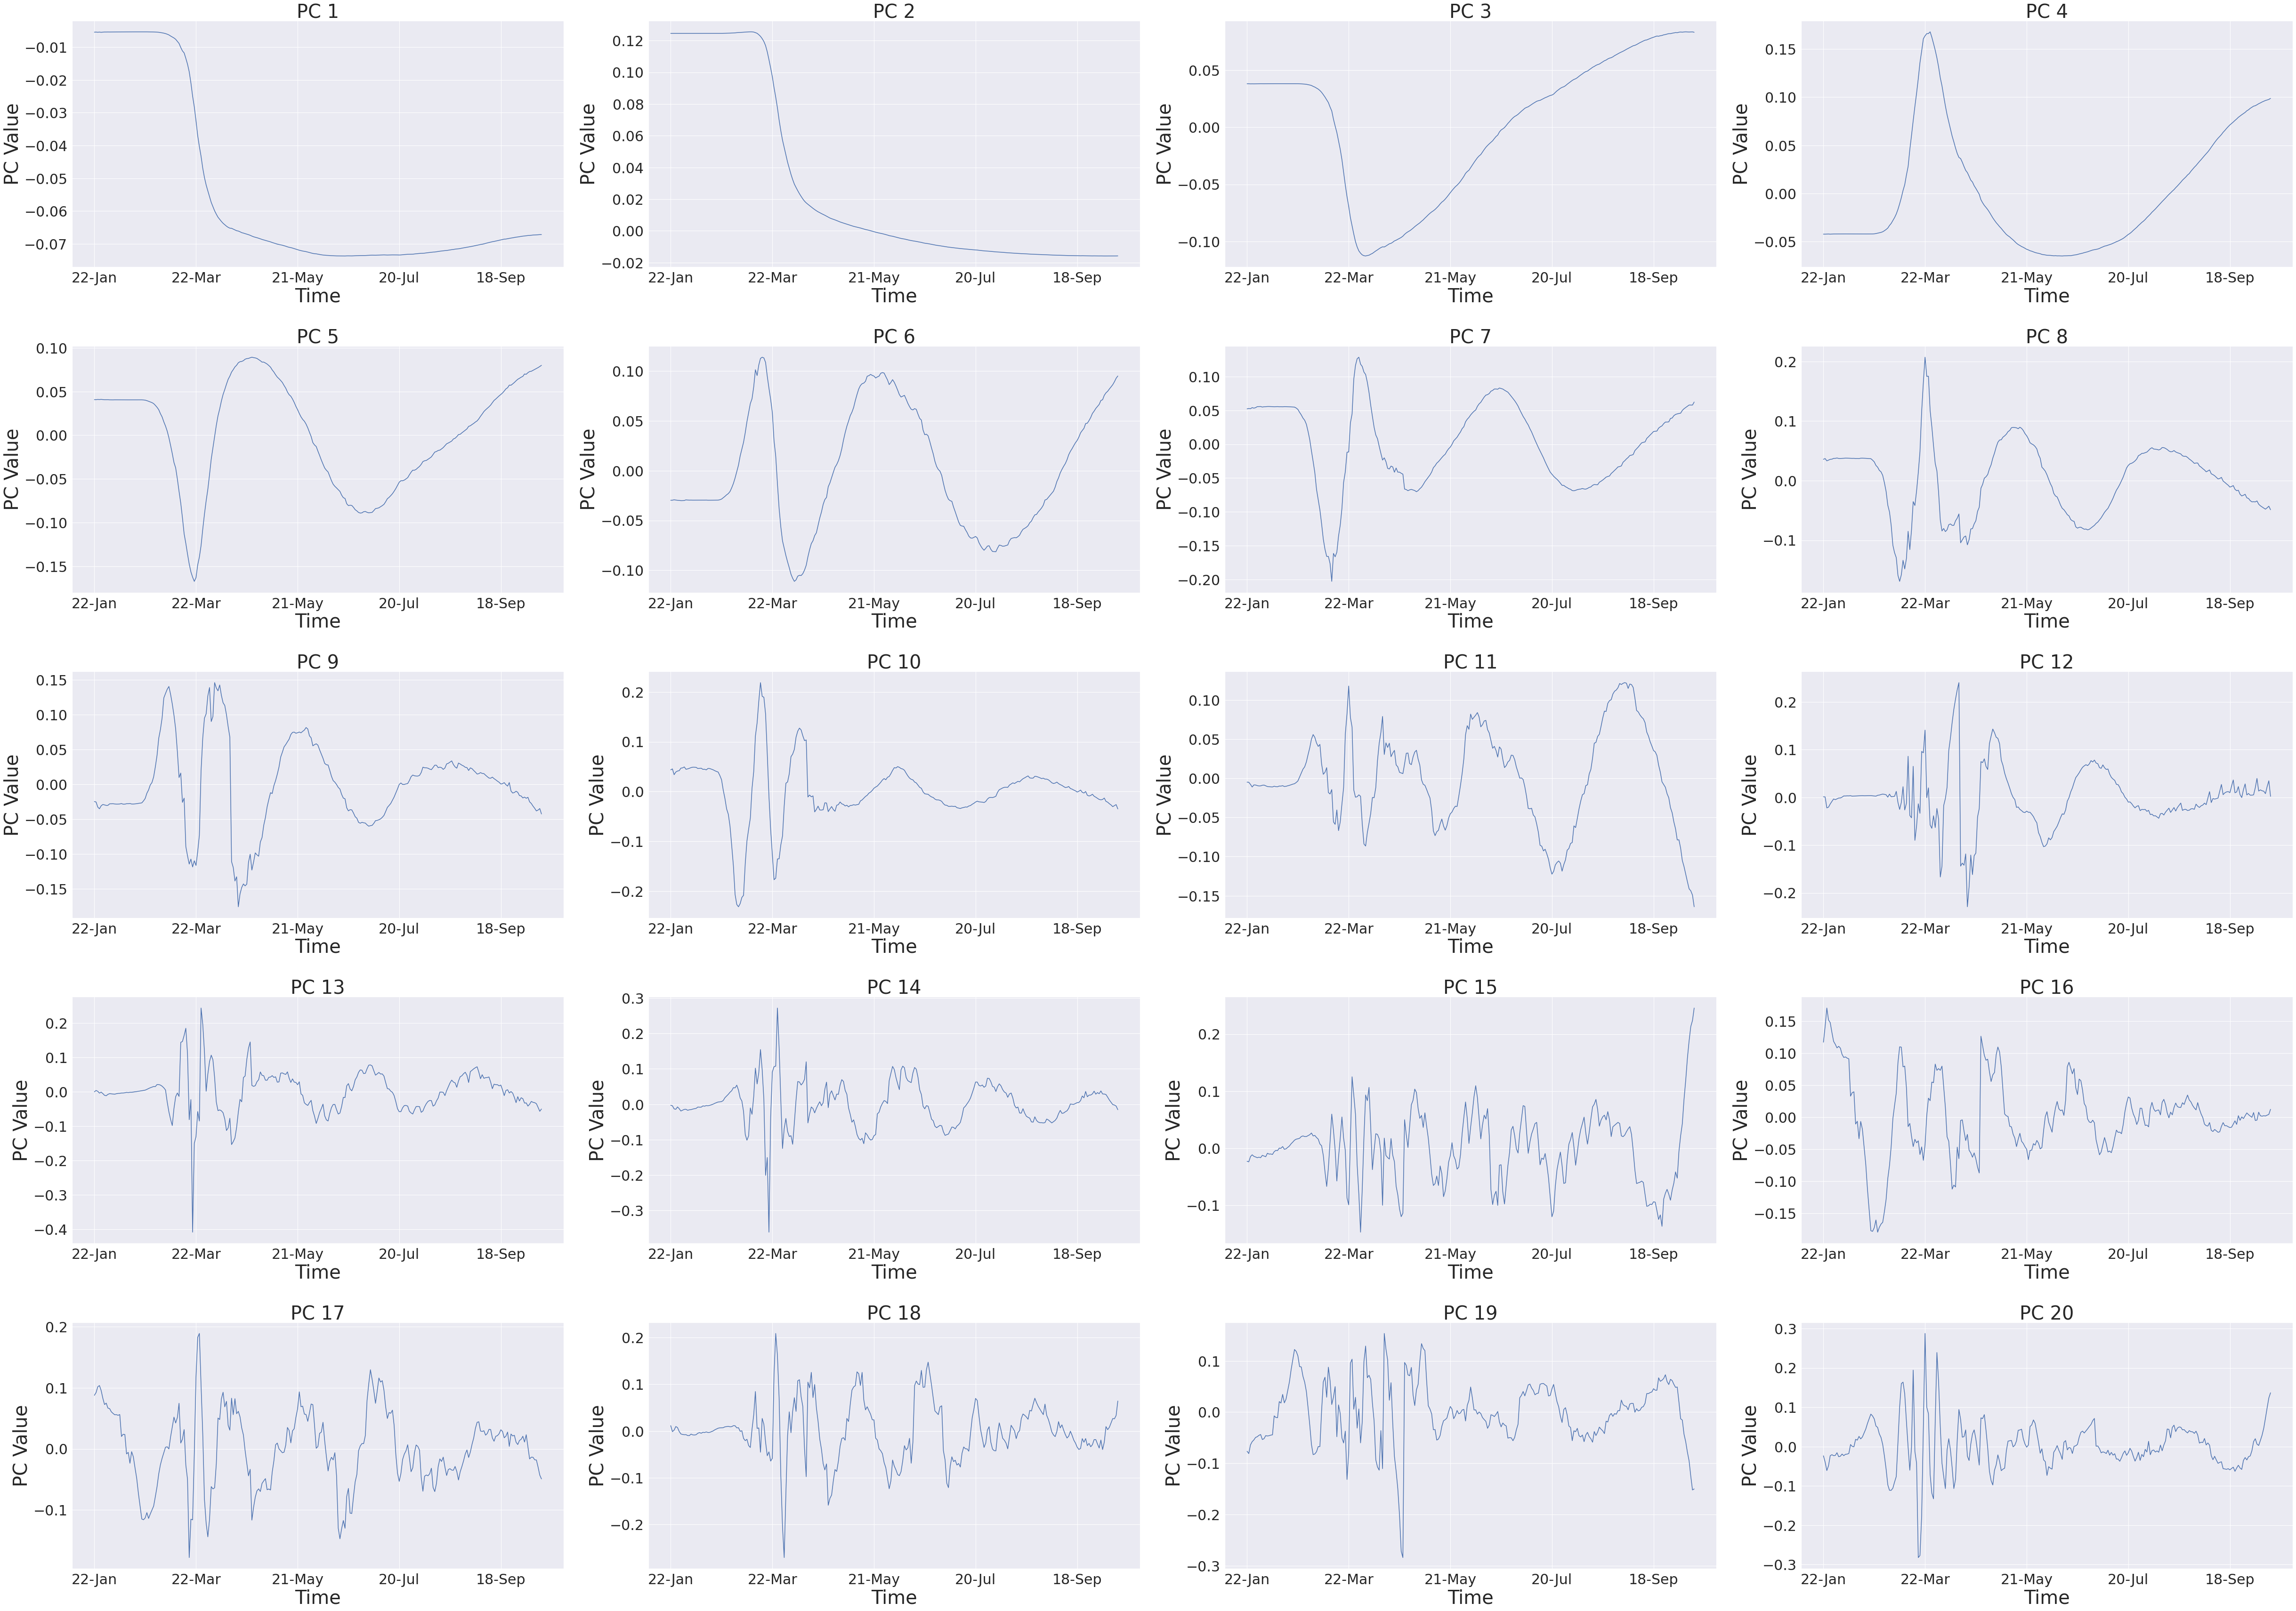

In [ ]:
#Plotting

date = cases_raw.columns

fig_dims = (70,50)
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(5,4,figsize=fig_dims)
fig.tight_layout(pad=12.0)

for i in range (0,5):
  for j in range (0,4):
    g = sns.lineplot(x=date, y=eigenVectors[:,4*i+j], ax=axes[i,j])
    g.xaxis.set_major_locator(ticker.MultipleLocator(60))
    g.set_xlabel('Time', fontsize=40)
    g.set_ylabel('PC Value',fontsize=40)
    g.set_title('PC ' + str(4*i+j+1),fontsize=40)
    g.tick_params(labelsize=30)

plt.show()

**6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? [0.5]**

***The first few PCs look simpler and have less oscillations than the rest of the PCs. The shape of the eigenvectors gradually becomes more complex. The first few PCs capture the general trend of the dataset and cover a large portion of the variance. The rest of the PCs cover specific details of the data and each cover fewer variances.***

# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
def Func_P3 (country):
  
  fig_dims = (20,20)
  sns.set_theme(style="darkgrid")
  fig, axes = plt.subplots(2,2,figsize=fig_dims)
  fig.tight_layout(pad=10.0)

#Plotting standardized time-series for the specified country
  g1 = sns.lineplot(x=date, y=country, data=dataset, ax=axes[0,0])
  g1.xaxis.set_major_locator(ticker.MultipleLocator(30))
  g1.set_xlabel('Time', fontsize=15)
  g1.set_ylabel('Standardized Number ',fontsize=15)
  g1.set_title('Pandemic in '+ str(country),fontsize=15)
  g1.tick_params(labelsize=12.5)

#Incremental reconstruction of the standardized time-series
  for i in range (0,10):
    W = eigenVectors[:, 0:i+1]
    projX = np.dot(dataset[country].T, W)
    ReconX = np.dot(projX, W.T)
    g2 = sns.lineplot(x=date, y=ReconX, ax=axes[0,1], legend='auto', label=str(i+1)+' PC')
    g2.xaxis.set_major_locator(ticker.MultipleLocator(30))
    g2.set_xlabel('Time', fontsize=15)
    g2.set_ylabel('Standardized Number',fontsize=15)
    g2.set_title('Reconstruction Data of '+ str(country),fontsize=15)
    g2.tick_params(labelsize=12.5)

#Calculating residual error (difference between the original plot and the reconstruction)
 
  for i in range (0,10):
    resX = []
    
    W = eigenVectors[:, 0:i+1]
    projX = np.dot(dataset[country].T, W)
    ReconX = np.dot(projX, W.T)
    
    for j in range (0,265):
      resX.append(np.linalg.norm(dataset[country][j] - ReconX[j]))
    
    g3 = sns.lineplot(x=date, y=resX, ax=axes[1,0], legend='auto', label=str(i+1)+' PC')
    g3.xaxis.set_major_locator(ticker.MultipleLocator(30))
    g3.set_xlabel('Time', fontsize=15)
    g3.set_ylabel('Residual Error',fontsize=15)
    g3.set_title('Residual Error of reconstruction of '+ str(country),fontsize=15)
    g3.tick_params(labelsize=12.5)

#Calculating RMSE
  comp = np.arange(1,11,1)
  RMSE = []
  
  for i in range (0,10):
    W = eigenVectors[:, 0:i+1]
    projX = np.dot(dataset[country].T, W)
    ReconX = np.dot(projX, W.T)
    RMSE.append((sum((dataset[country]-ReconX)**2)/265)**0.5)

  g4 = sns.lineplot(x=comp, y=RMSE, ax=axes[1,1])
  g4.xaxis.set_major_locator(ticker.MultipleLocator(1))
  g4.set_xlabel('Number of Components', fontsize=15)
  g4.set_ylabel('RMSE',fontsize=15)
  g4.set_title('RMSE vs. Number of Components Used for Reconstruction of '+ str(country),fontsize=15)
  g4.tick_params(labelsize=12.5)

#Printing numnber of components needed for RMSE to be a certain value
  a = 0
  b = 0
  c = 0
  for i in range (0, len(RMSE)):
    if RMSE[i]<1:
      a=a+1
    if RMSE[i]<0.1:
      b=b+1
    if RMSE[i]<0.01:
      c=c+1
  
  print(len(RMSE)-a+1," PC(s) are needed for RMSE to be less than 1")
  print(len(RMSE)-b+1," PC(s) are needed for RMSE to be less than 0.1")
  print(len(RMSE)-c+1," PC(s) are needed for RMSE to be less than 0.01")


In [ ]:
dataset = df_cases_scaled

3  PC(s) are needed for RMSE to be less than 1
5  PC(s) are needed for RMSE to be less than 0.1
8  PC(s) are needed for RMSE to be less than 0.01


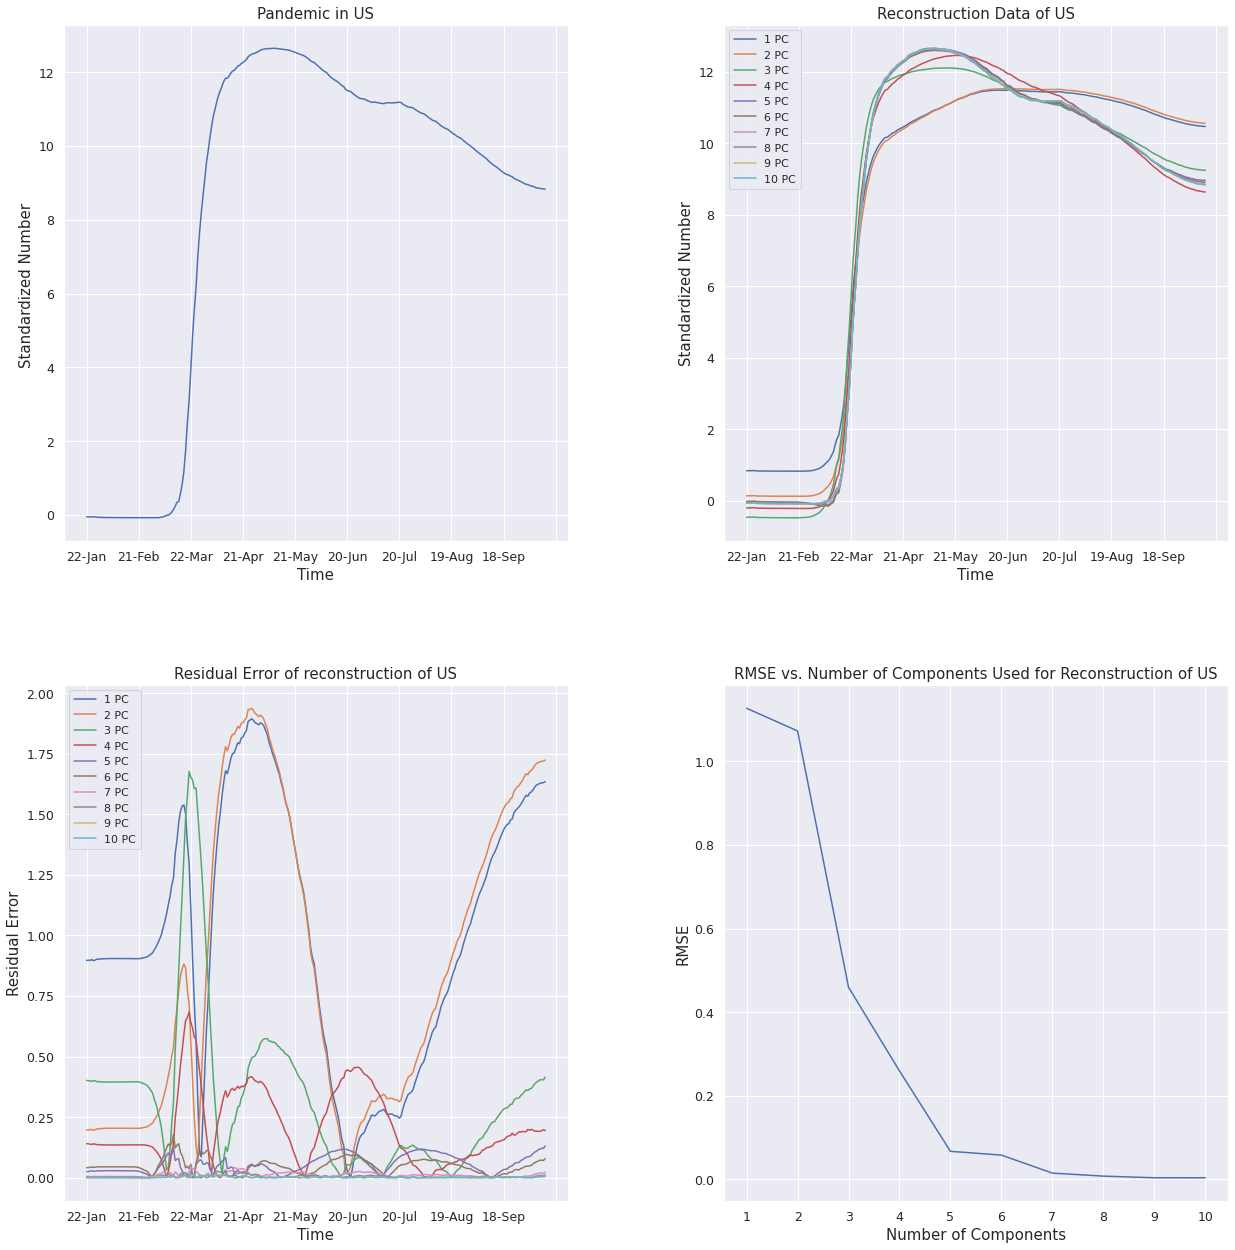

In [ ]:
Func_P3("US")

1  PC(s) are needed for RMSE to be less than 1
3  PC(s) are needed for RMSE to be less than 0.1
7  PC(s) are needed for RMSE to be less than 0.01


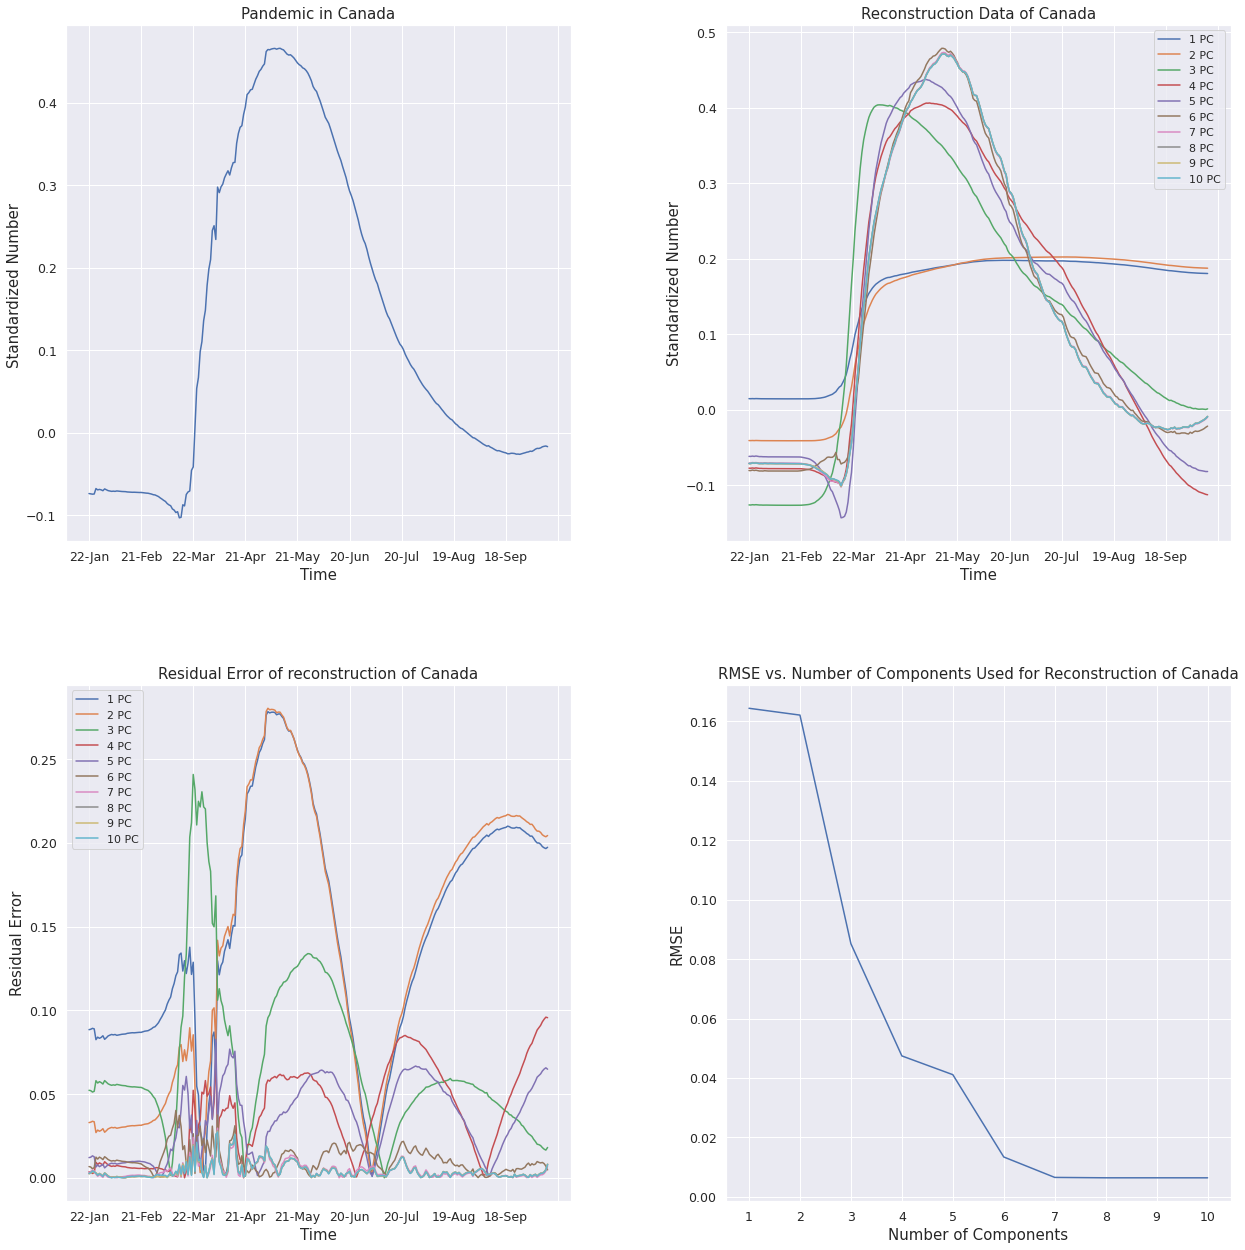

In [ ]:
Func_P3("Canada")

2  PC(s) are needed for RMSE to be less than 1
4  PC(s) are needed for RMSE to be less than 0.1
5  PC(s) are needed for RMSE to be less than 0.01


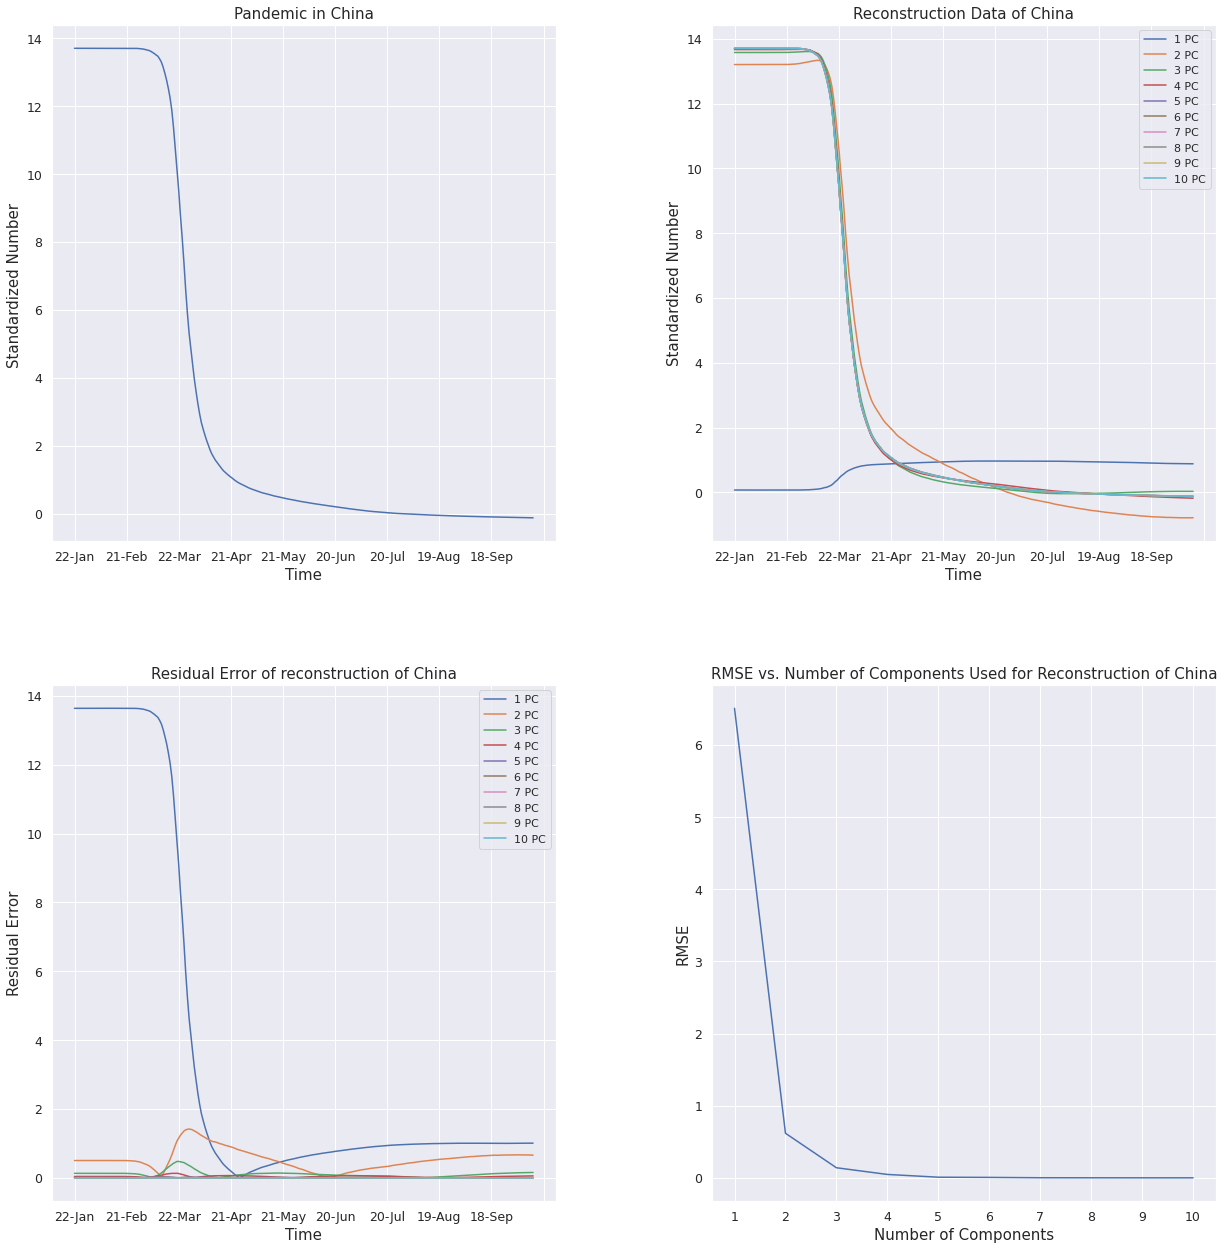

In [ ]:
Func_P3("China")

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
df_death = death_raw.T
df_death['Time'] = death_raw.columns
df_death

Afghanistan  Albania  Algeria  Andorra  ...  Yemen  Zambia  Zimbabwe    Time
22-Jan            0        0        0        0  ...      0       0         0  22-Jan
23-Jan            0        0        0        0  ...      0       0         0  23-Jan
24-Jan            0        0        0        0  ...      0       0         0  24-Jan
25-Jan            0        0        0        0  ...      0       0         0  25-Jan
26-Jan            0        0        0        0  ...      0       0         0  26-Jan
...             ...      ...      ...      ...  ...    ...     ...       ...     ...
08-Oct         1470      411     1783       54  ...    593     335       229  08-Oct
09-Oct         1472      413     1789       55  ...    593     336       229  09-Oct
10-Oct         1473      416     1795       55  ...    595     337       230  10-Oct
11-Oct         1477      420     1801       55  ...    595     337       230  11-Oct
12-Oct         1479      424     1809       57  ...    596     345       230  12-Oct

[265 rows x 190 columns]

In [ ]:
#Standardizing the data

time2 = death_raw.columns
features2 = death_raw.index
death_scaled = StandardScaler().fit_transform(death_raw)
df_death_scaled = pd.DataFrame(data=death_scaled, index = features2, columns = time2)
df_death_scaled = df_death_scaled.T
df_death_scaled['Time'] = time2
df_death_scaled

Afghanistan   Albania   Algeria  ...    Zambia  Zimbabwe    Time
22-Jan    -0.072932 -0.072932 -0.072932  ... -0.072932 -0.072932  22-Jan
23-Jan    -0.072932 -0.072932 -0.072932  ... -0.072932 -0.072932  23-Jan
24-Jan    -0.072932 -0.072932 -0.072932  ... -0.072932 -0.072932  24-Jan
25-Jan    -0.072932 -0.072932 -0.072932  ... -0.072932 -0.072932  25-Jan
26-Jan    -0.072932 -0.072932 -0.072932  ... -0.072932 -0.072932  26-Jan
...             ...       ...       ...  ...       ...       ...     ...
08-Oct    -0.189803 -0.238255 -0.175482  ... -0.241733 -0.246582  08-Oct
09-Oct    -0.190219 -0.238422 -0.175790  ... -0.241927 -0.246798  09-Oct
10-Oct    -0.190626 -0.238560 -0.176024  ... -0.242143 -0.246995  10-Oct
11-Oct    -0.190875 -0.238683 -0.176221  ... -0.242437 -0.247276  11-Oct
12-Oct    -0.191285 -0.238893 -0.176393  ... -0.242458 -0.247648  12-Oct

[265 rows x 190 columns]

In [ ]:
# Compute covariance matrix

o,p = death_scaled.shape
D = np.dot(death_scaled.T, death_scaled) / (o-1) 
D.shape

(265, 265)

In [ ]:
#Computing eigen values and eigen vectors

eigenValues2, eigenVectors2 = np.linalg.eigh(D) 
print ("Eigen Vector:\n ",eigenVectors2, " \n\n Eigen Value: \n", eigenValues2)

Eigen Vector:
  [[ 0.          0.          0.         ...  0.04110795  0.12769635
  -0.00416301]
 [-0.2842075  -0.0820835  -0.05873721 ...  0.04110795  0.12769635
  -0.00416301]
 [-0.08795231 -0.13334382  0.01169761 ...  0.04110795  0.12769635
  -0.00416301]
 ...
 [ 0.00393198  0.00029303 -0.0160335  ...  0.0725345  -0.01386481
  -0.06885824]
 [ 0.01364877  0.00389648 -0.00340188 ...  0.07266572 -0.0138748
  -0.06881917]
 [-0.01021655 -0.01668011  0.0093431  ...  0.07269117 -0.01387614
  -0.06879268]]  

 Eigen Value: 
 [-5.50725401e-14 -5.01883643e-14 -4.54839054e-14 -3.97793217e-14
 -3.54622317e-14 -3.08800494e-14 -3.06318219e-14 -3.04020609e-14
 -2.58626230e-14 -2.16394955e-14 -1.57665702e-14 -1.36515181e-14
 -1.33808951e-14 -1.28771121e-14 -1.07367346e-14 -8.03067315e-15
 -8.01123038e-15 -7.60835939e-15 -7.01513504e-15 -5.42343145e-15
 -5.39357078e-15 -4.97573236e-15 -4.63169212e-15 -4.02474821e-15
 -3.96937495e-15 -3.30207980e-15 -3.25970853e-15 -2.99605373e-15
 -2.81292262e-15 -2

In [ ]:
#Sort eigen values and eigen vectors in decreasing order

args = (-eigenValues2).argsort()
eigenValues2 = eigenValues2[args]
eigenVectors2 = eigenVectors2[:, args]

In [ ]:
#Calculating explained variances and cumulative variances

eigValSum2 = sum(eigenValues2)
explained_Var2 = [eigV/eigValSum2*100 for eigV in eigenValues2]
cumulative_ExpVar2 = np.cumsum(explained_Var2)

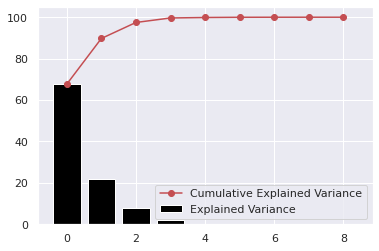

In [ ]:
#Plotting the first 10 eigen vectors

plt.bar(range(9), explained_Var2[0:9], color='black', label='Explained Variance')
plt.plot(cumulative_ExpVar2[0:9], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [ ]:
for i in range (len(cumulative_ExpVar2)):
  print("% variance covered with",i+1,"PC(s):",cumulative_ExpVar2[i])
  
  if cumulative_ExpVar2[i] > 99:
    break
  
print("\n As shown above,", i+1, "PCs are needed to cover 99% of the dataset's variance.")

% variance covered with 1 PC(s): 67.65653394874832
% variance covered with 2 PC(s): 89.72478866918135
% variance covered with 3 PC(s): 97.46016907210735
% variance covered with 4 PC(s): 99.62997171636529

 As shown above, 4 PCs are needed to cover 99% of the dataset's variance.


In [ ]:
#overwrite dataset

dataset = df_death_scaled

2  PC(s) are needed for RMSE to be less than 1
11  PC(s) are needed for RMSE to be less than 0.1
11  PC(s) are needed for RMSE to be less than 0.01


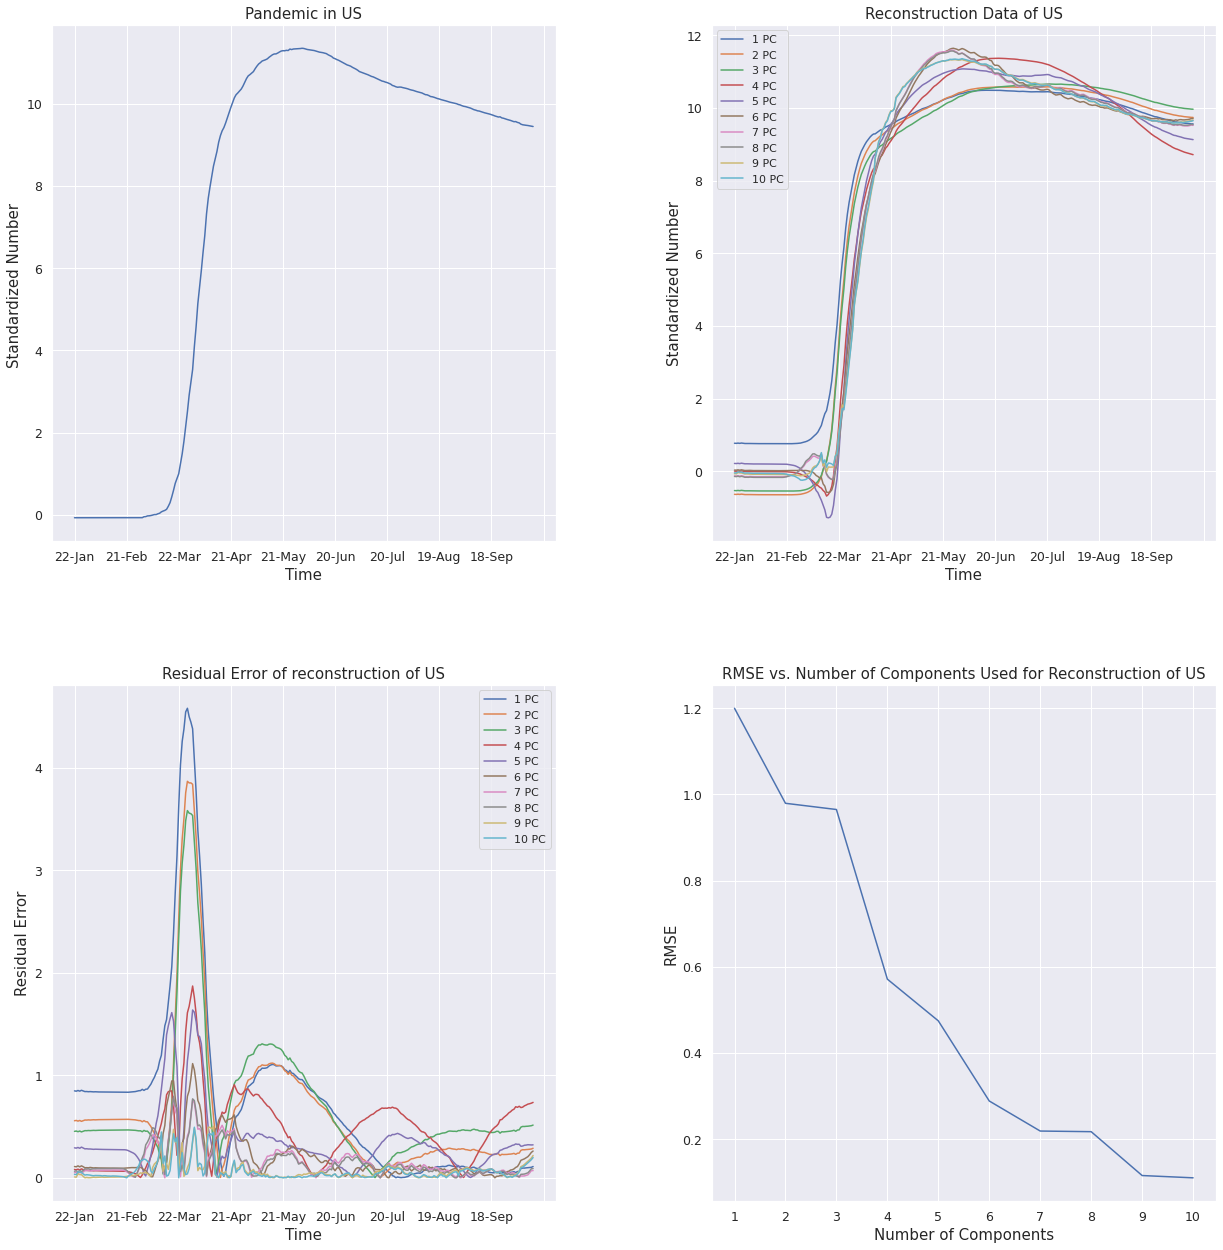

In [ ]:
Func_P3("US")

1  PC(s) are needed for RMSE to be less than 1
4  PC(s) are needed for RMSE to be less than 0.1
10  PC(s) are needed for RMSE to be less than 0.01


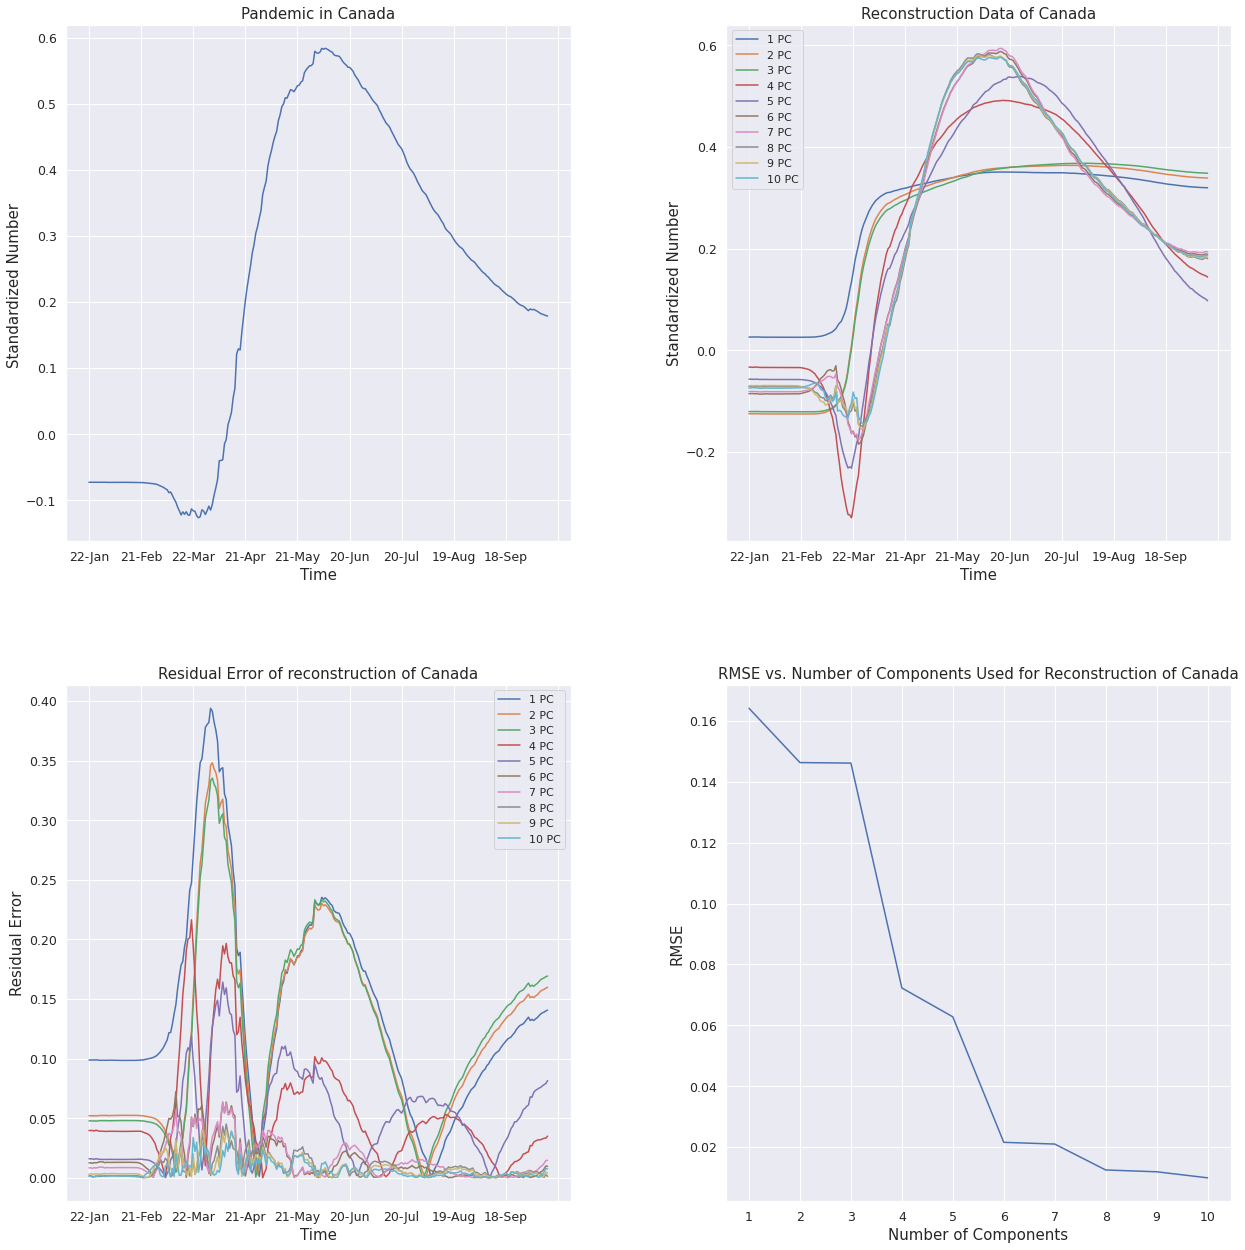

In [ ]:
Func_P3("Canada")

3  PC(s) are needed for RMSE to be less than 1
8  PC(s) are needed for RMSE to be less than 0.1
11  PC(s) are needed for RMSE to be less than 0.01


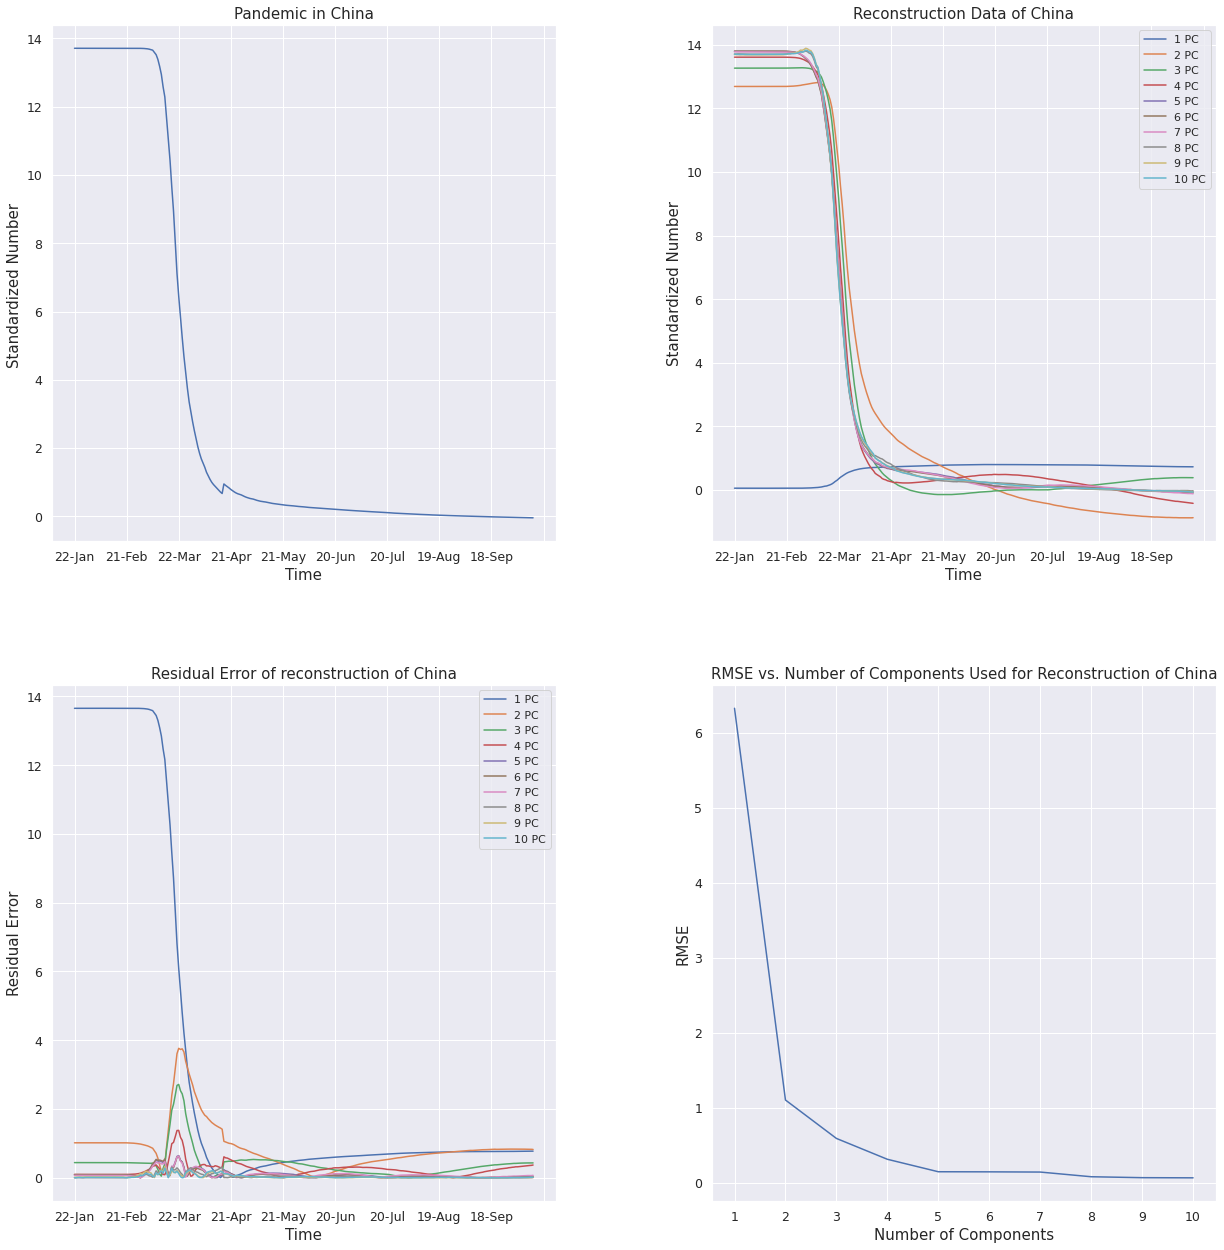

In [ ]:
Func_P3("China")

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.





In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

Label is: 2


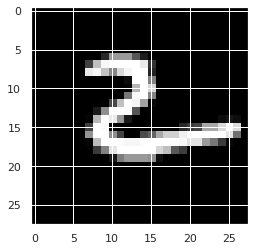

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[109].reshape(28,28)) 
print ("Label is:", y[109])
plt.show() 

**1. Compute the covariance of the dataframe and perform eigendecomposition. [1]**

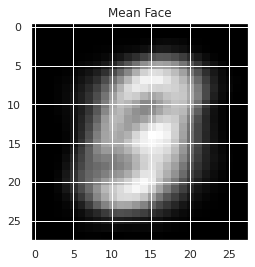

In [ ]:
#Mean face

meanImage = np.reshape(x.mean(axis=0), x[0].reshape(28,28).shape)
plt.imshow(meanImage, cmap=plt.cm.gray)
plt.title('Mean Face')
plt.show()

In [ ]:
#Standardizing data
mu = x.mean(axis=0)
x = x-mu

#Calculating the covariance of X
E = np.dot(x.T, x)
eigenValues3, eigenVectors3 = np.linalg.eigh(E)
print ("The Dimension of Full Eigen Vectors", eigenVectors3.shape)

#Sort eigenVectors in descending order by their eigenValue
idex = np.argsort(-eigenValues3)
eigenValues3 = eigenValues3[idex]
eigenVectors3 = eigenVectors3[:, idex]

#Select based on numOfBasis
def getBasisCountThatPreservesVariance(eigenValues, variance=0.98):
  #This function calculates how many eigenvalues we need in order to get 98% of the variants
    for idex, cumulativeSum in enumerate(np.cumsum(eigenValues3) / np.sum(eigenValues3)):
        if cumulativeSum > variance:
            return idex

numOfBasis = getBasisCountThatPreservesVariance(eigenValues3)
print('The Number of useful eigenBasis is: ', numOfBasis)
eigenValues_useful = eigenValues3[0:numOfBasis].copy()
eigenVectors_useful = eigenVectors3[:,0:numOfBasis].copy()


The Dimension of Full Eigen Vectors (784, 784)
The Number of useful eigenBasis is:  213


**2. Plot the first 10 eigenvectors. What trends do you observe? [1]**

***As shown, the first few images have relatively simpler patterns, which indicates that the first few images capture the general trend and characteristics among all the letters. The shape of the letter gradually becomes more complex, indicating that the eigenvectors become more specific and each covers smaller variances compared to the first ones.***

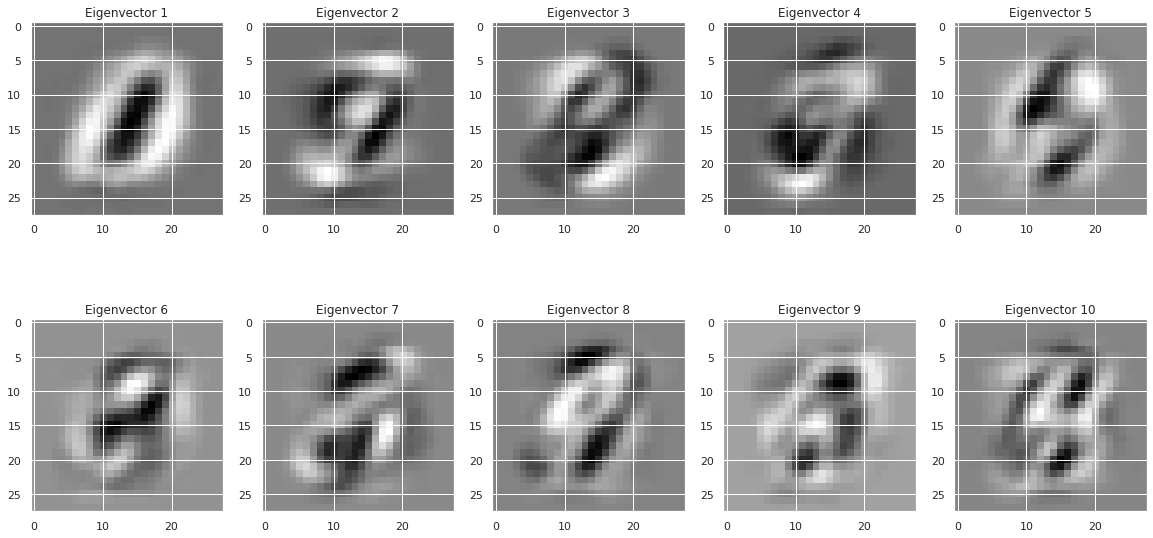

In [ ]:
fig_dims = (20,10)
fig, axes = plt.subplots(2,5,figsize=fig_dims)

for j in range (0,2):
  for k in range (0,5):  
    eigenVectors_reshape=eigenVectors_useful[:,5*j+k].reshape(28,28)
    axes[j,k].imshow(eigenVectors_reshape, cmap=plt.cm.gray)
    axes[j,k].title.set_text('Eigenvector '+ str(5*j+k+1))

plt.show()


**3. Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). [1]**

In [ ]:
import math
import random

In [ ]:
def Func_P5(n):

#Generating the image index randomly and plot the image
  k = random.randint(0,999)
  print("The chosen image is: ")
  plt.imshow(x[k].reshape(-1,28), cmap=plt.cm.gray)
  plt.show()
  print("The index of the image is: ", k)

#Reconstructing
  Recon_img = []
  steps = np.arange(1,n+1,1) #number of eigen vectors used for incremental reconstruction

  for nums in steps:
    W_p5 = eigenVectors_useful[:, 0:nums]
    projX_p5 = np.dot(x[k].reshape(1,-1), W_p5)
    ReconX_p5 = np.dot(projX_p5, W_p5.T) + mu
    Recon_img.append(ReconX_p5.reshape(-1,28))

#Plotting reconstructed images
  COUNT = len(steps)
  ROWS = math.ceil(COUNT/3)
  fig = plt.figure(figsize=(12, ROWS * 4))
  
  for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(Recon_img[i], cmap = plt.cm.gray)
    plt.title("Reconstruction: "+ str(steps[i]) + " Components" )

The chosen image is: 


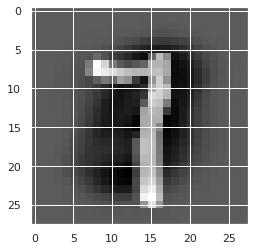

The index of the image is:  936


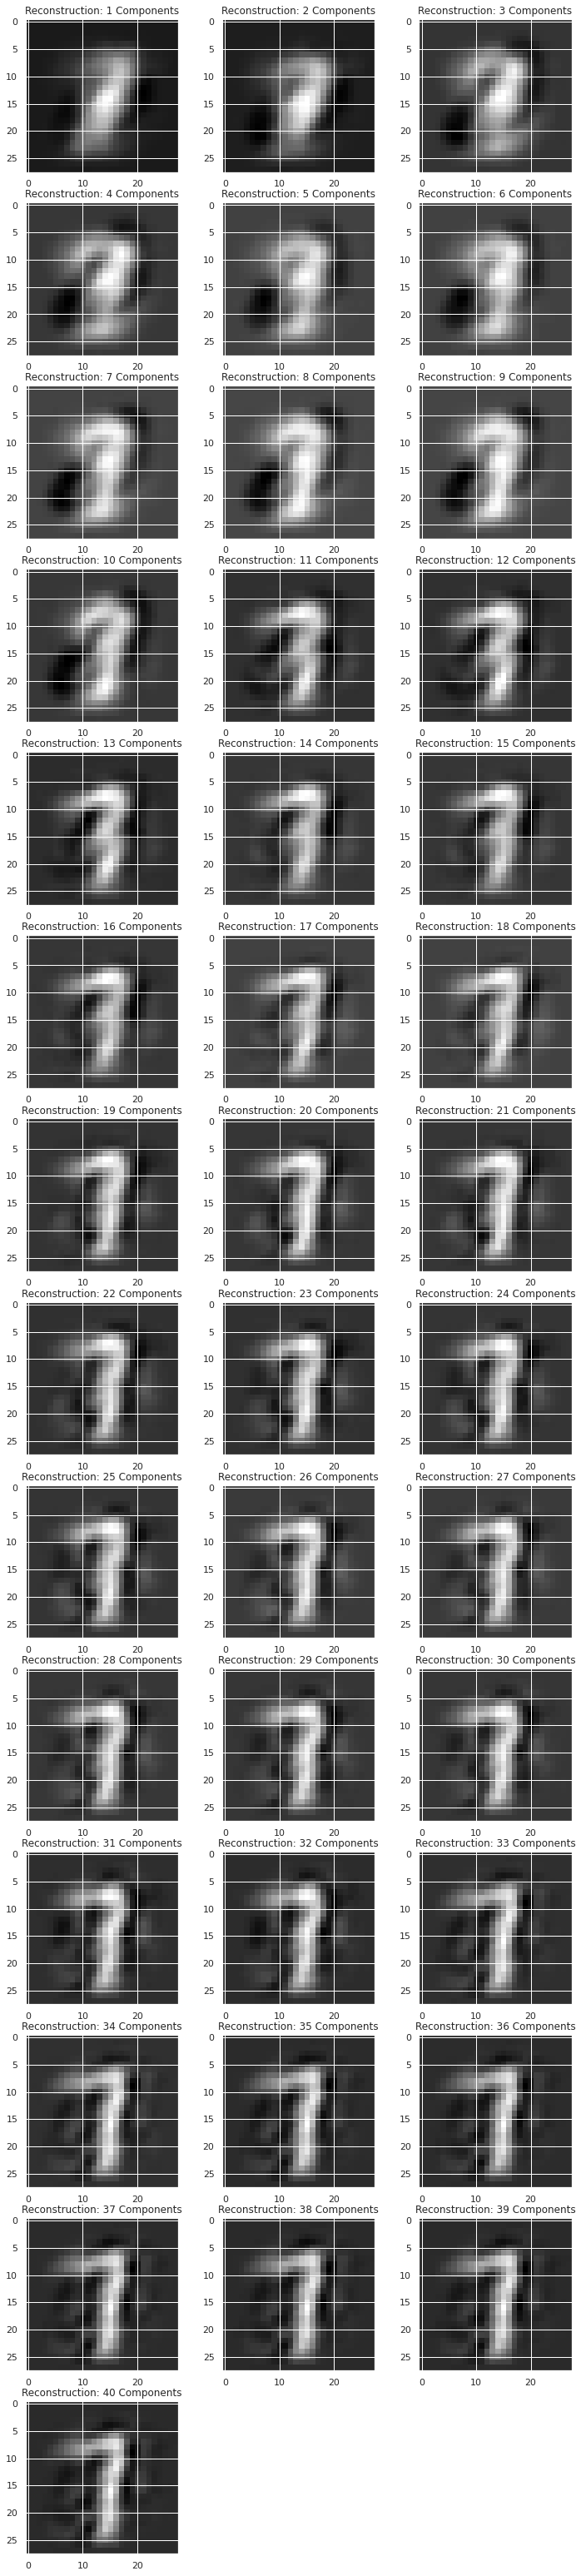

In [ ]:
Func_P5(40)

**4. Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. [1]**

The chosen image is: 


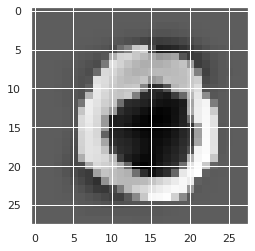

The index of the image is:  56


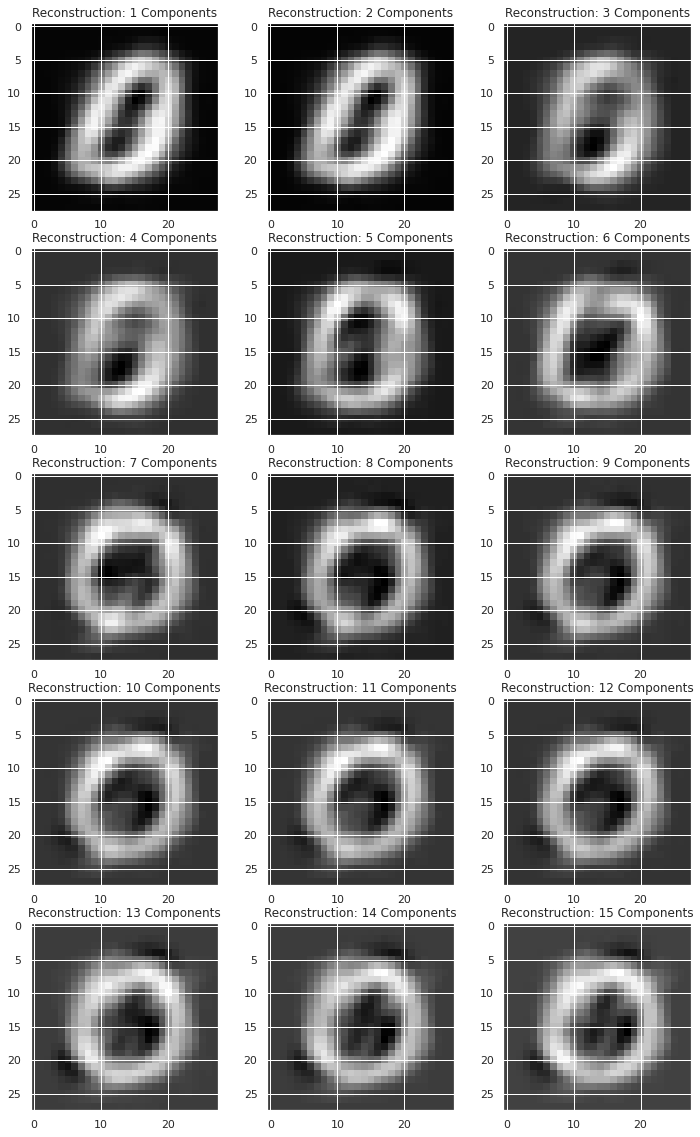

In [ ]:
#Using 15 components
Func_P5(15)

The chosen image is: 


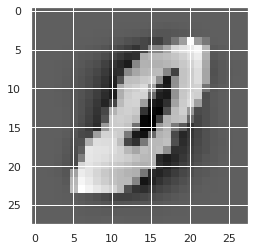

The index of the image is:  712


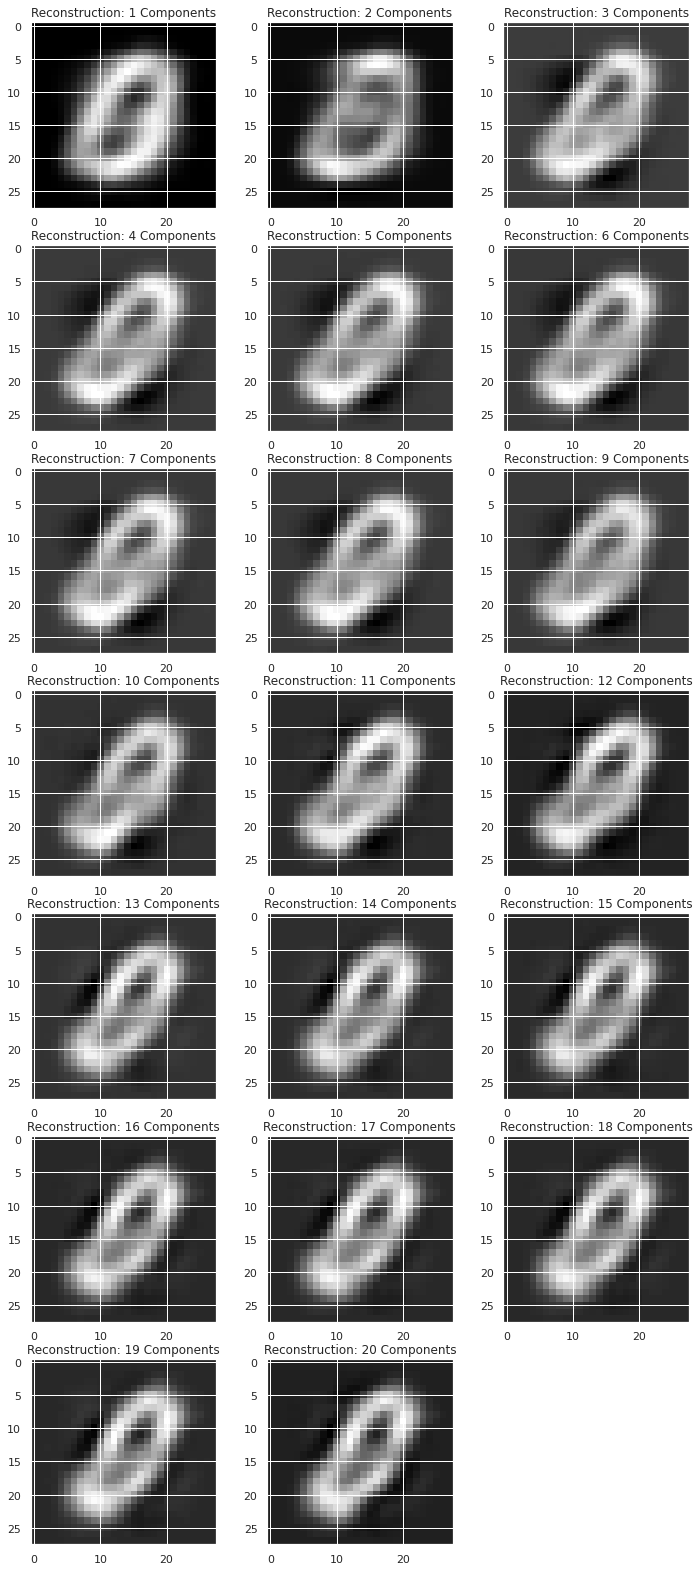

In [ ]:
#Using 20 components
Func_P5(20)

The chosen image is: 


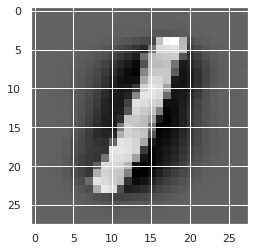

The index of the image is:  765


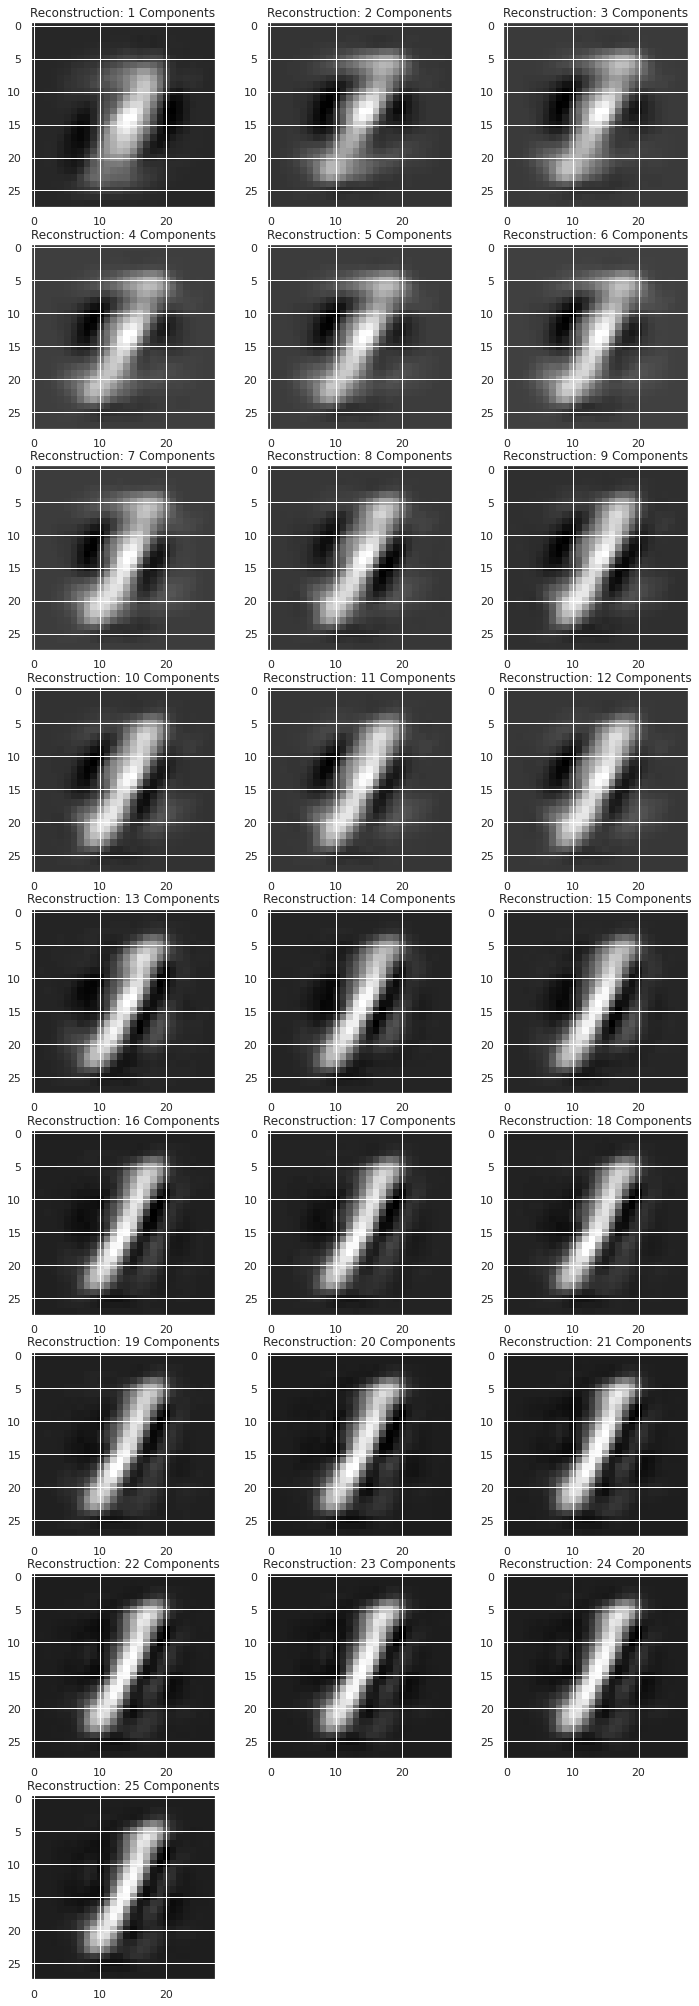

In [ ]:
#Using 25 components
Func_P5(25)

The chosen image is: 


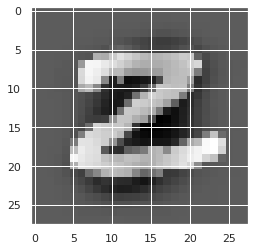

The index of the image is:  117


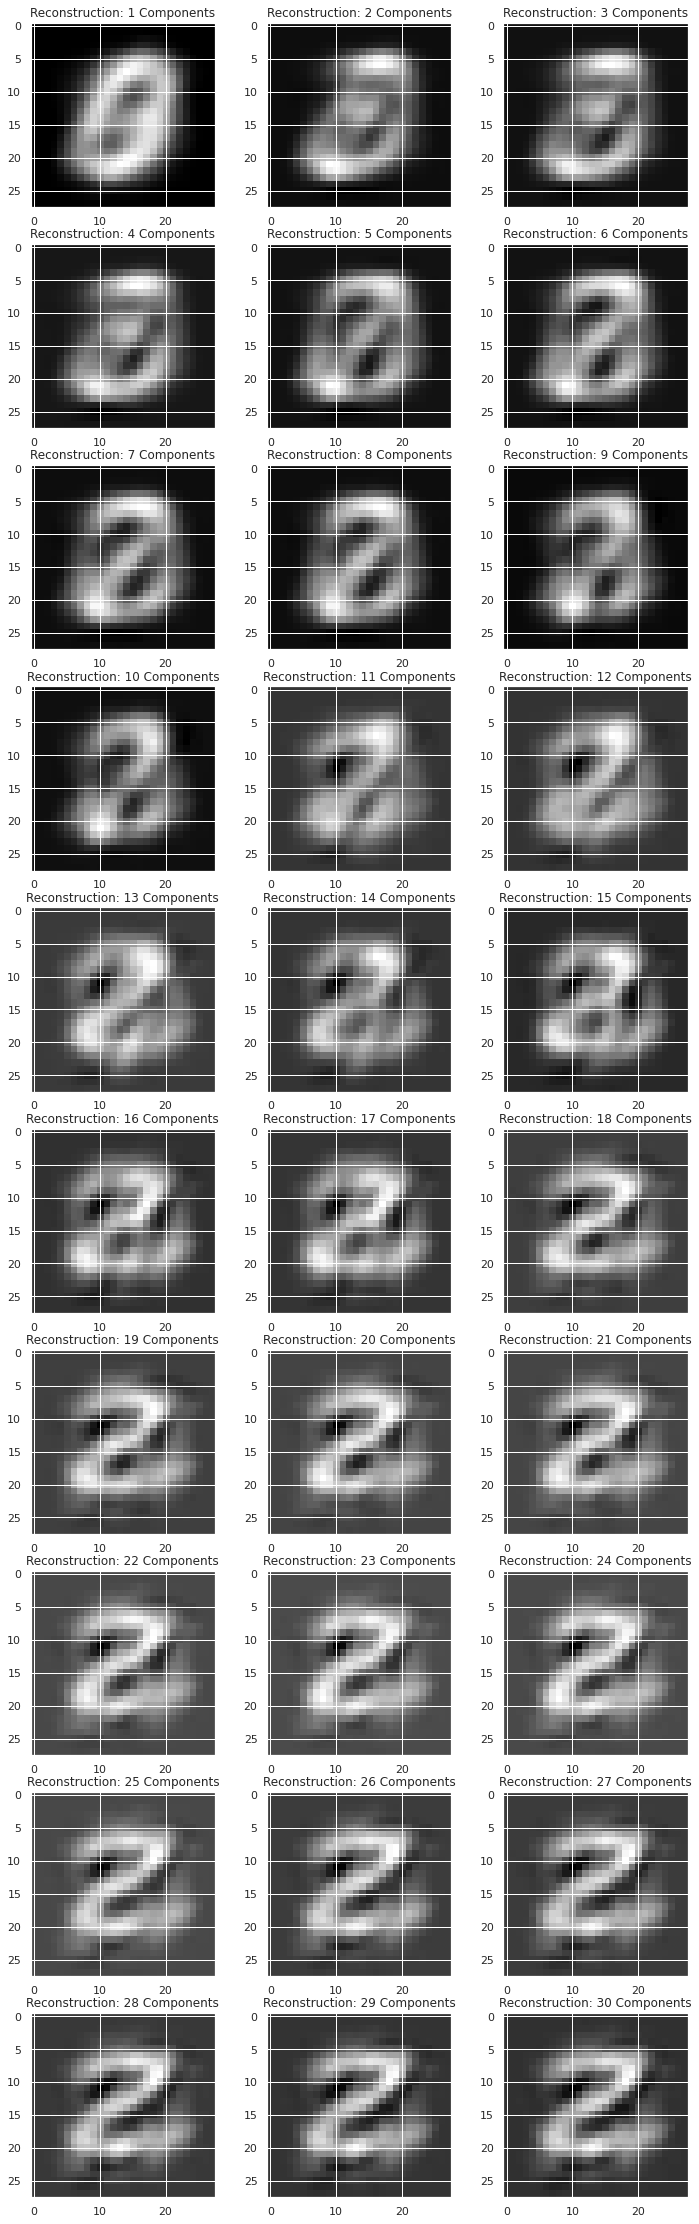

In [ ]:
#Using 30 components
Func_P5(30)

The chosen image is: 


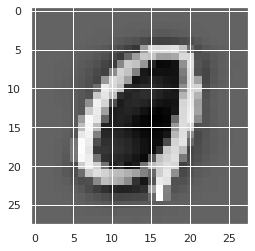

The index of the image is:  902


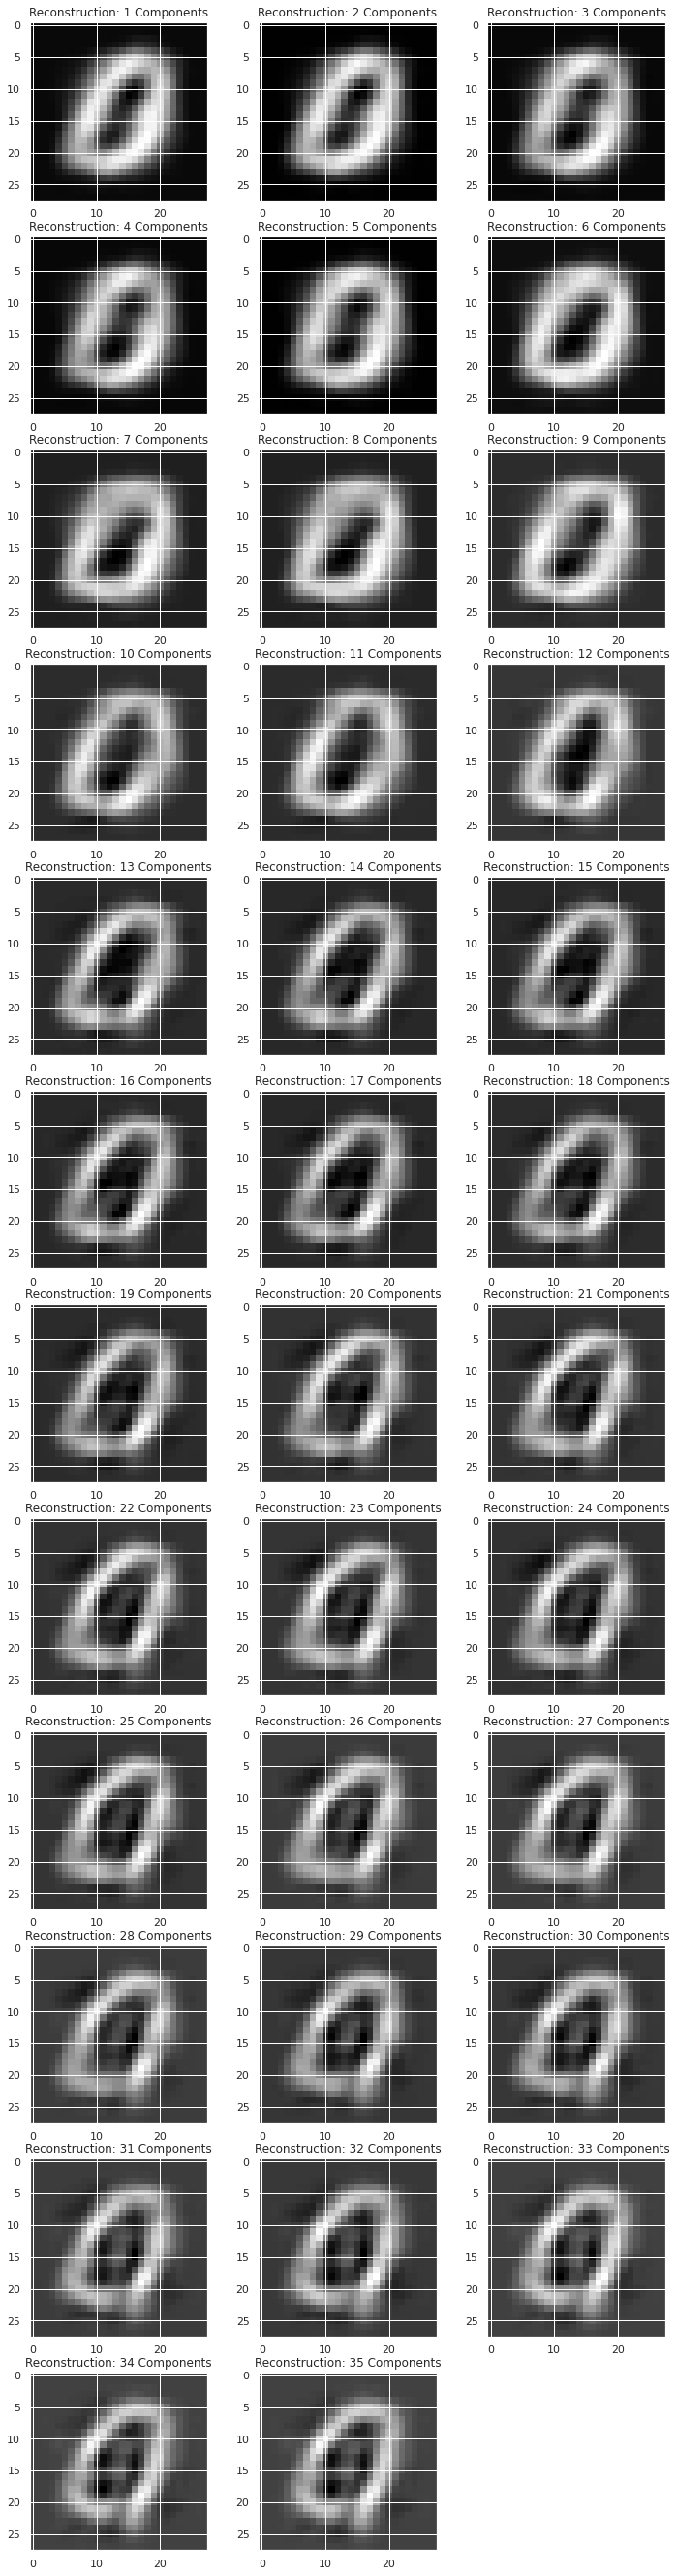

In [ ]:
#Using 35 components
Func_P5(35)

The chosen image is: 


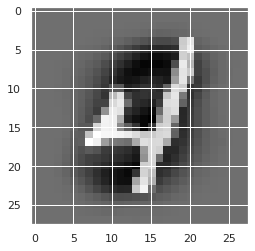

The index of the image is:  289


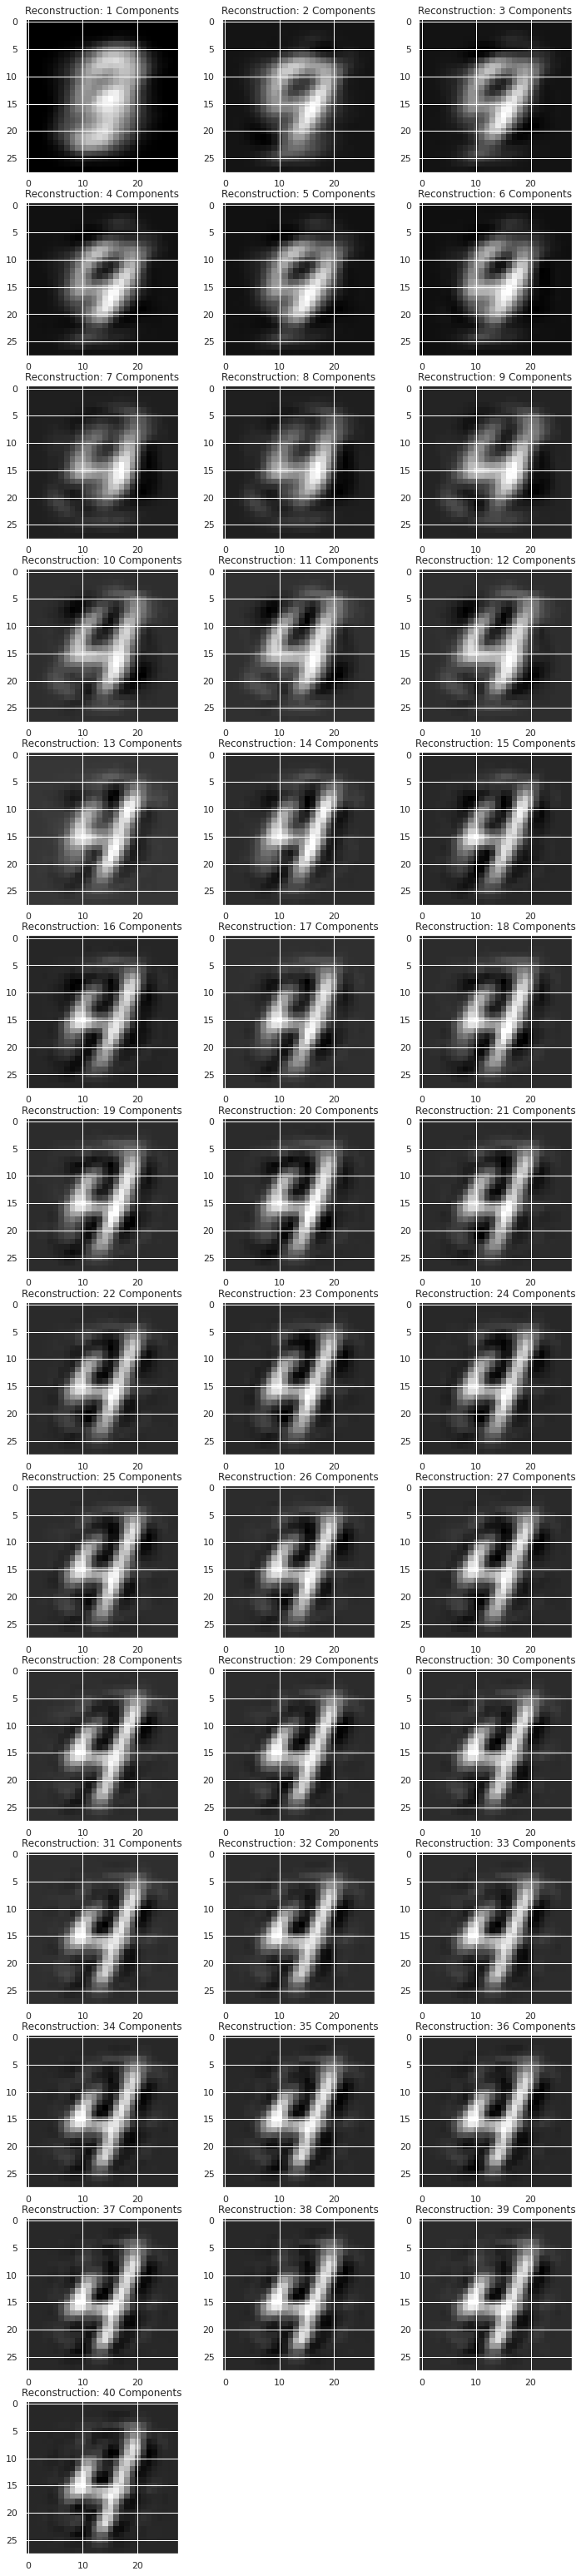

In [ ]:
#Using 40 components
Func_P5(40)

The chosen image is: 


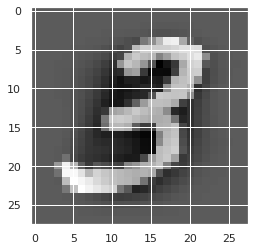

The index of the image is:  157


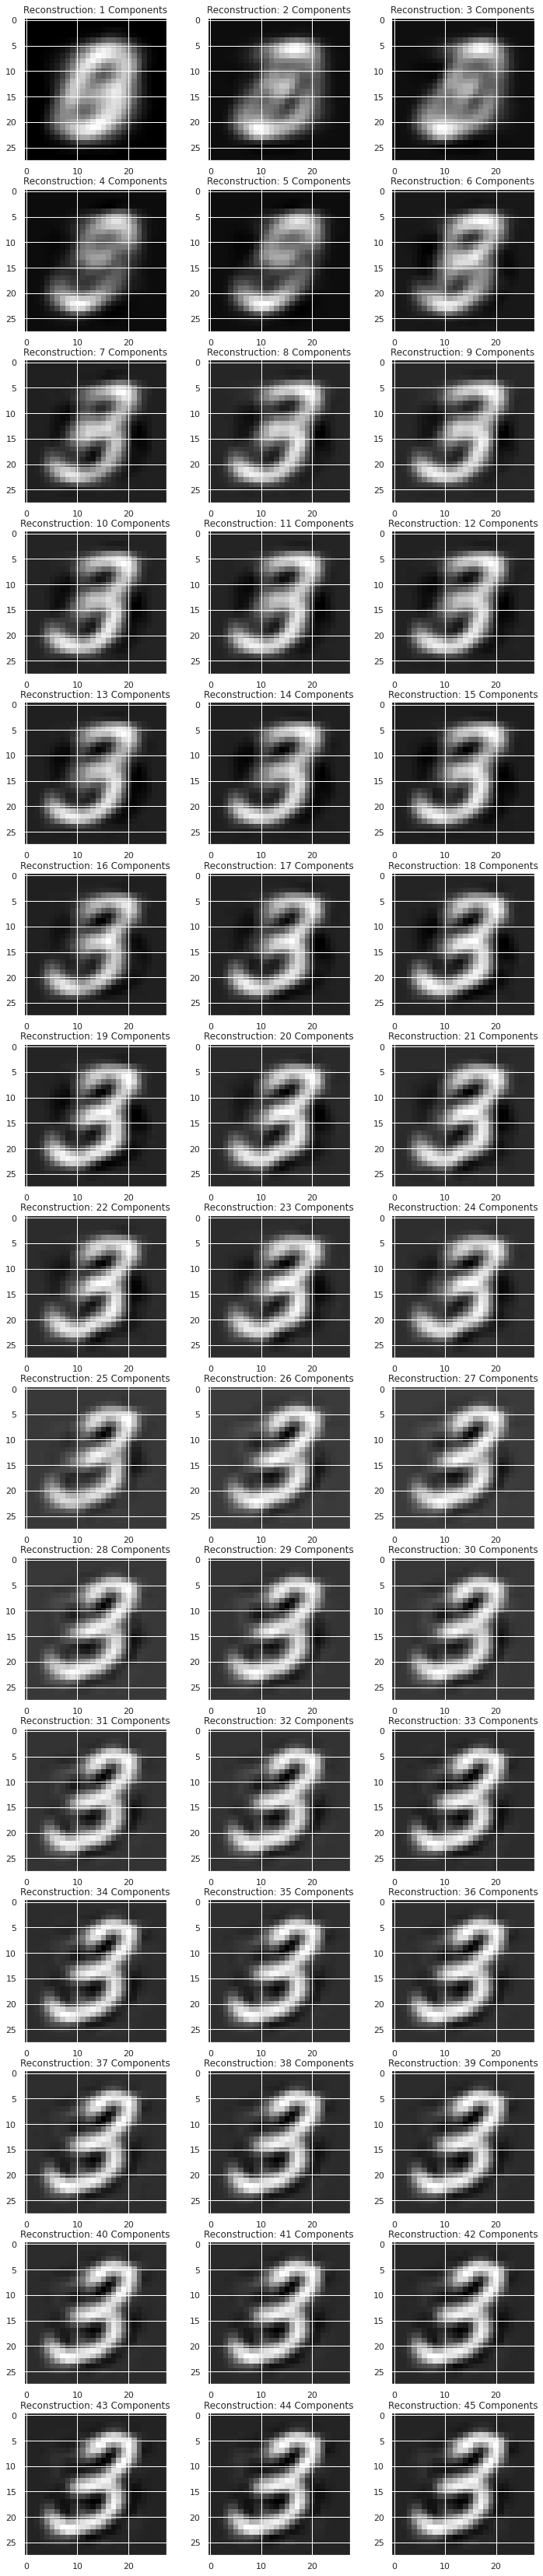

In [ ]:
#Using 45 components
Func_P5(45)

The chosen image is: 


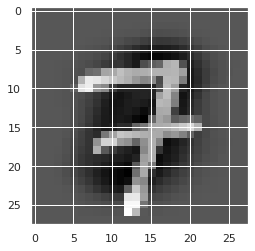

The index of the image is:  898


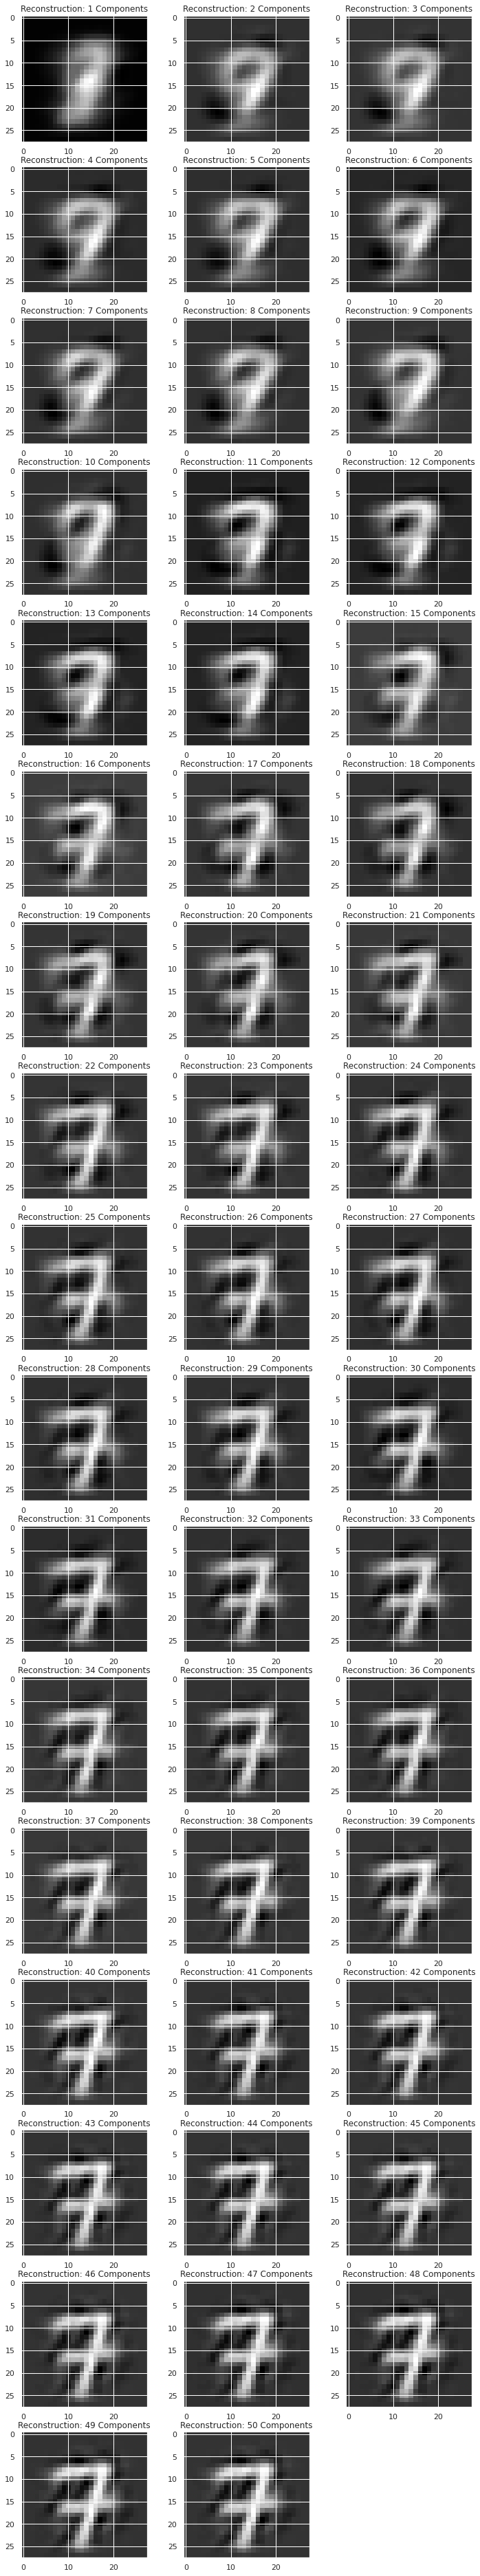

In [ ]:
#Using 50 components
Func_P5(50)

The chosen image is: 


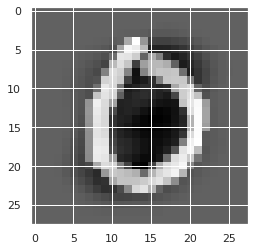

The index of the image is:  612


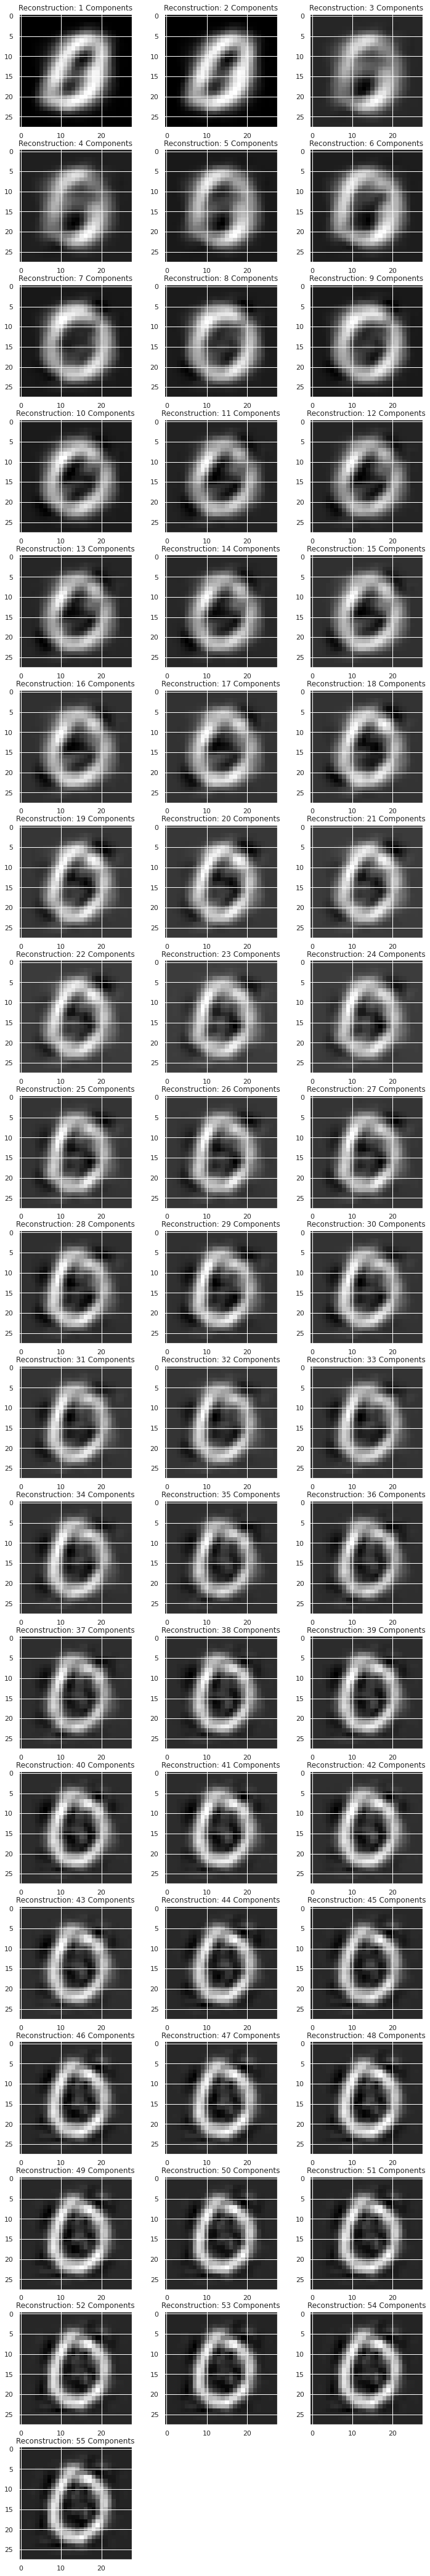

In [ ]:
#Using 55 components
Func_P5(55)

The chosen image is: 


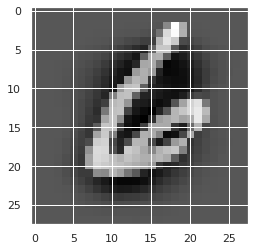

The index of the image is:  901


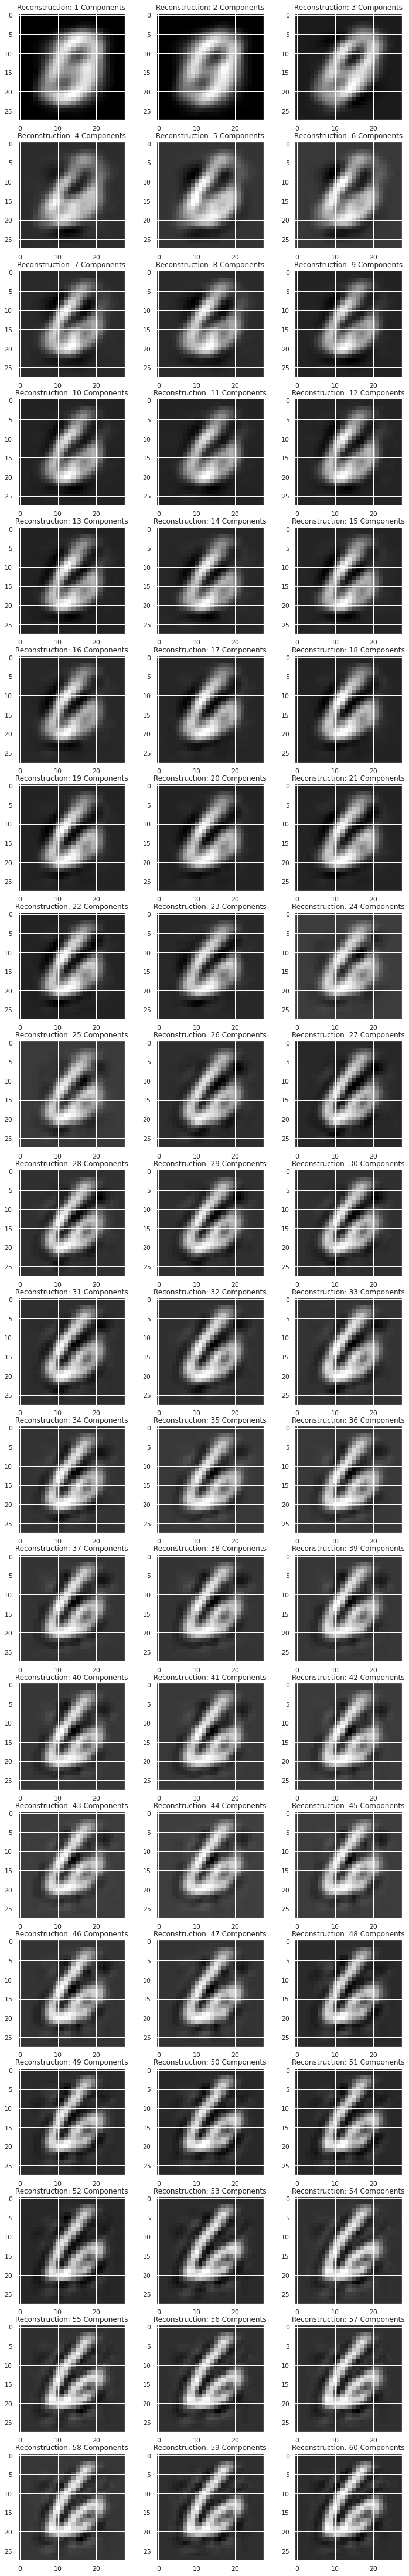

In [ ]:
#Using 60 components
Func_P5(60)

The chosen image is: 


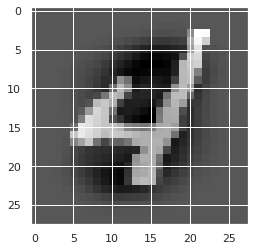

The index of the image is:  329


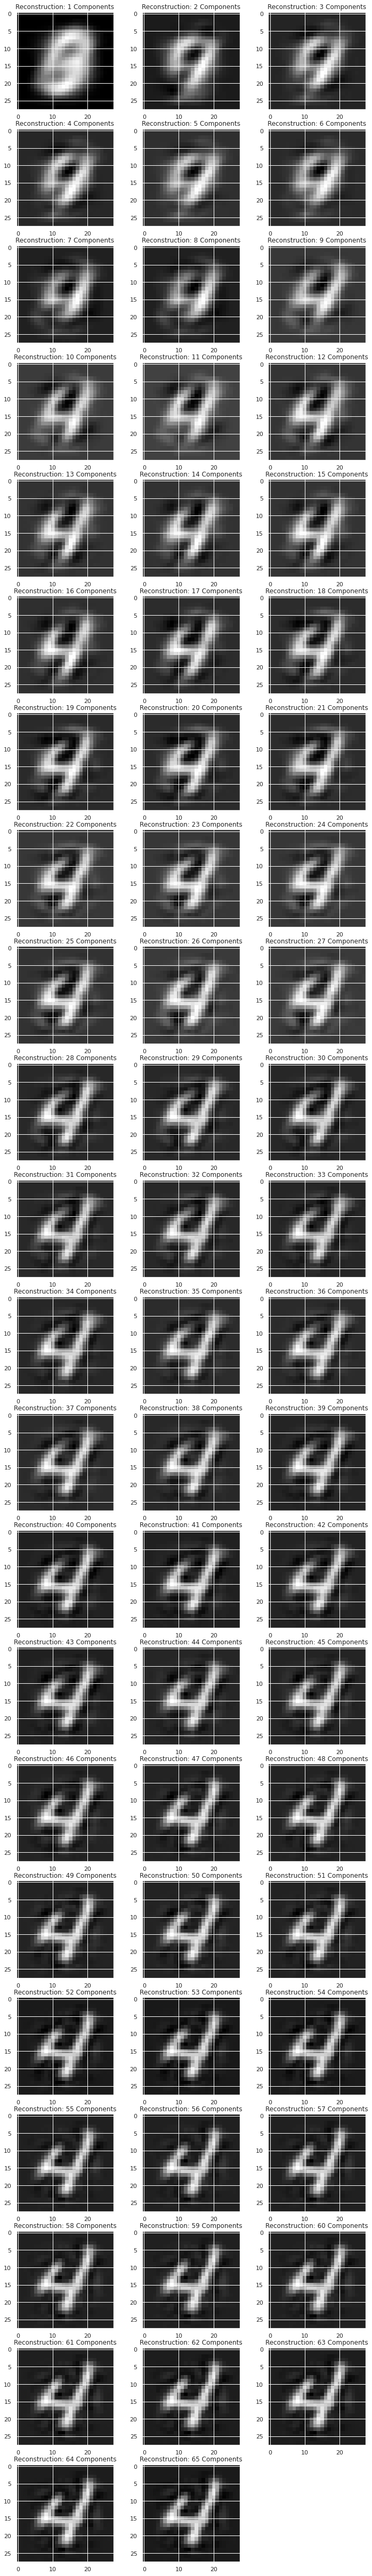

In [ ]:
#Using 65 components
Func_P5(65)

The chosen image is: 


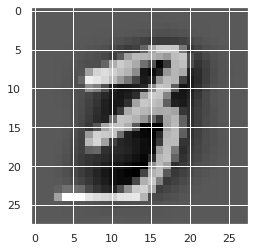

The index of the image is:  953


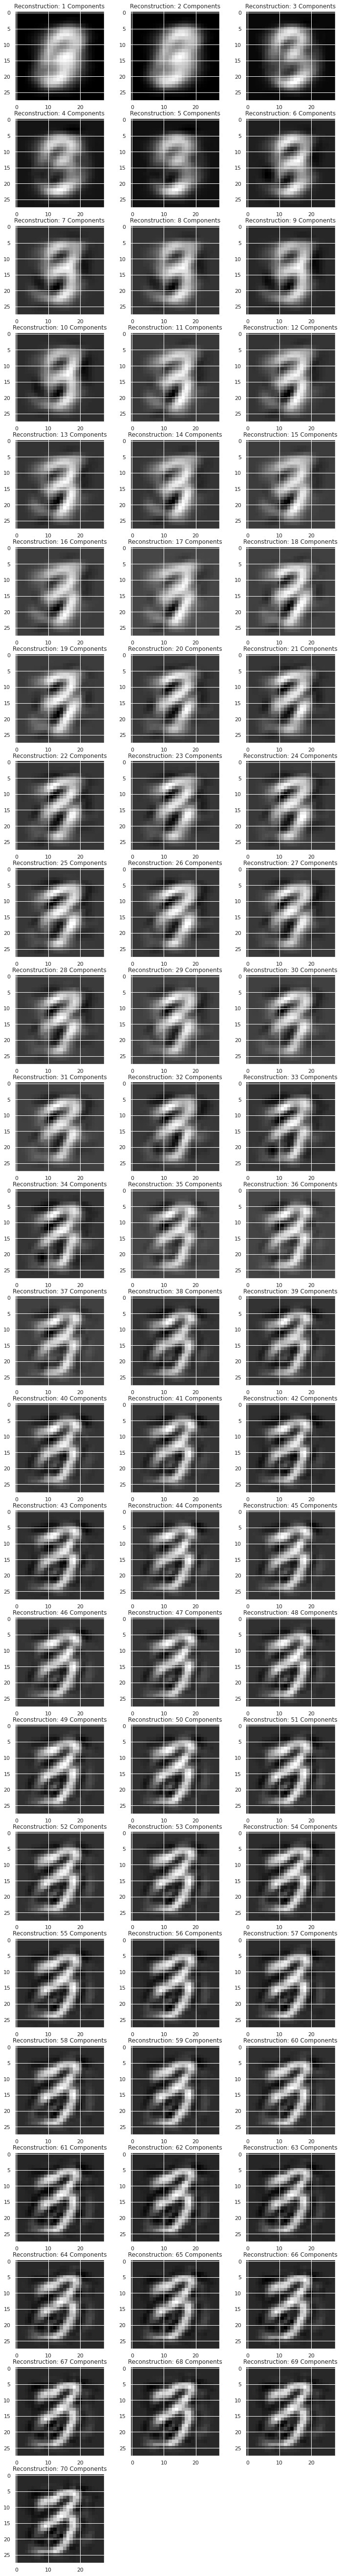

In [ ]:
#Using 70 components
Func_P5(70)

***As shown, it seems that at least 40 componens are usually needed to have a clear reconstructed image in which the letter can be distinguisned by human eyes. However, considering the worst case scenario, 55 components may be needed in order to produce a clear image that human eyes would have no difficulty recognizing.***

**5. With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections*. [1]**

In [ ]:
print("The size of dataset x: ", x.size, "elements")
print("The size of components needed to create a recognizable reconstructed image: ", len(eigenVectors_useful)*55, "elements")
print("The size of the projection: ", 1000*55, "elements")
print("The total number of elements used for reconstruction is:", len(eigenVectors_useful)*55+1000*55)
print("The compression ratio is:", round((x.size)/(len(eigenVectors_useful)*55+1000*55),2))

The size of dataset x:  784000 elements
The size of components needed to create a recognizable reconstructed image:  43120 elements
The size of the projection:  55000 elements
The total number of elements used for reconstruction is: 98120
The compression ratio is: 7.99


# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


